# 0. 환경설정

In [1]:
# 페키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# 폰트 오류 해결
import platform
platform.system()
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

In [3]:
# 행 개수 조정
pd.set_option('display.max_row', 600)

# 열 개수 조정
pd.set_option('display.max_columns', 200)

# 1. 데이터 불러오기 및 기본 처리

## 1.1. 데이터 불러오기

In [4]:
df = pd.read_csv("./data/유기동물보호현황.csv", engine='python', encoding='CP949')
df

,시군명,접수일자,발견장소,상태,공고고유번호,공고시작일자,공고종료일자,품종,색상,나이,체중,성별,중성화여부,특징,보호소명,보호소전화번호,보호소도로명주소,보호소지번주소,보호소우편번호,관할기관,특이사항,이미지경로,썸네일이미지경로,WGS84위도,WGS84경도
0,남양주시,20210704,진건파출소,보호중,경기-남양주-2021-00878,20210704,20210714,[개] 믹스견,흰색,2016(년생),3.50(Kg),M,Y,"말티즈,푸들 믹스견 , 순함",남양주동물보호협회,031-591-7270,경기도 남양주시 금곡로 44,경기도 남양주시 금곡동 427-28번지 성원빌딩 1층,12237,경기도 남양주시,NaN,http://www.animal.go.kr/files/shelter/2021/06/...,http://www.animal.go.kr/files/shelter/2021/06/...,37.633902,127.207918
1,남양주시,20210704,다산동,보호중,경기-남양주-2021-00879,20210704,20210714,[고양이] 한국 고양이,흑백,2021(년생),0.55(Kg),F,N,호흡기질환,남양주동물보호협회,031-591-7270,경기도 남양주시 금곡로 44,경기도 남양주시 금곡동 427-28번지 성원빌딩 1층,12237,경기도 남양주시,NaN,http://www.animal.go.kr/files/shelter/2021/06/...,http://www.animal.go.kr/files/shelter/2021/06/...,37.633902,127.207918
2,군포시,20210703,군포소방서에서 인수,종료(반환),경기-군포-2021-00066,20210703,20210715,[개] 비글,백갈흑,2015(년생),15(Kg),M,Y,칩있음(대한이),한국야생동물보호협회,031-296-0124,경기도 안산시 상록구 청곡길 50,경기도 안산시 상록구 부곡동 231-5번지,15301,경기도 군포시,NaN,http://www.animal.go.kr/files/shelter/2021/06/...,http://www.animal.go.kr/files/shelter/2021/06/...,37.340254,126.870005
3,안산시,20210703,월피동 489-18 부근,보호중,경기-안산-2021-00690,20210703,20210715,[고양이] 한국 고양이,흰바탕삼색,2021(년생),0.4(Kg),F,N,"눈꼽,콧물 심함. 많이 말랐음. 식욕부진",스타캣츠,031-410-3777,경기도 안산시 단원구 한양대학로 208,경기도 안산시 단원구 고잔동 730-3번지 2층 스타캣츠,15466,경기도 안산시,NaN,http://www.animal.go.kr/files/shelter/2021/06/...,http://www.animal.go.kr/files/shelter/2021/06/...,37.313581,126.836756
4,안산시,20210703,삼일로497 단지 내 도로,보호중,경기-안산-2021-00691,20210703,20210715,[고양이] 한국 고양이,노란줄무늬,2021(년생),0.29(Kg),F,N,"눈꼽,콧물 심함. 많이 말랐음. 비틀거림. 식욕부진",스타캣츠,031-410-3777,경기도 안산시 단원구 한양대학로 208,경기도 안산시 단원구 고잔동 730-3번지 2층 스타캣츠,15466,경기도 안산시,NaN,http://www.animal.go.kr/files/shelter/2021/06/...,http://www.animal.go.kr/files/shelter/2021/06/...,37.313581,126.836756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,화성시,20210105,마도면 청원리 304-1 세진메탈,종료(자연사),경기-화성-2021-00019,20210105,20210114,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,031-356-2281,경기도 화성시 남양읍 화성로 1483-27,경기도 화성시 남양읍 북양리 12-2번지,18254,경기도 화성시,NaN,http://www.animal.go.kr/files/shelter/2020/11/...,http://www.animal.go.kr/files/shelter/2020/11/...,37.224949,126.843428
11532,화성시,20210105,마도면 청원리 304-1 세진메탈,종료(자연사),경기-화성-2021-00018,20210105,20210114,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,031-356-2281,경기도 화성시 남양읍 화성로 1483-27,경기도 화성시 남양읍 북양리 12-2번지,18254,경기도 화성시,NaN,http://www.animal.go.kr/files/shelter/2020/11/...,http://www.animal.go.kr/files/shelter/2020/11/...,37.224949,126.843428
11533,화성시,20210105,마도면 청원리 304-1 세진메탈,종료(자연사),경기-화성-2021-00016,20210105,20210114,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,031-356-2281,경기도 화성시 남양읍 화성로 1483-27,경기도 화성시 남양읍 북양리 12-2번지,18254,경기도 화성시,NaN,http://www.animal.go.kr/files/shelter/2020/11/...,http://www.animal.go.kr/files/shelter/2020/11/...,37.224949,126.843428
11534,화성시,20210105,마도면 청원리 304-1 세진메탈,종료(자연사),경기-화성-2021-00015,20210105,20210114,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,031-356-2281,경기도 화성시 남양읍 화성로 1483-27,경기도 화성시 남양읍 북양리 12-2번지,18254,경기도 화성시,NaN,http://www.animal.go.kr/files/shelter/2020/11/...,http://www.animal.go.kr/files/shelter/2020/11/...,37.224949,126.843428


### 데이터 저장

In [5]:
df_korean_original = df[df.columns]

### CSV로 저장 

In [6]:
df_korean_original.to_csv("./data/data_original.csv", encoding="utf-8-sig")

## 1.2. 용어 정리


도시(city) : 발견 장소의 도시











## 1.3. 열 이름 영어로 변경
편안한 분석을 위해 column 이름을 영어로 변경

In [7]:
df.columns = ['city', 'received_date', 'found_place', 'status', 'announcement_id',
              'announcement_start_date', 'announcement_end_date', 'breed', 'color',
              'age', 'weight', 'sex', 'is_neutered', 'characteristic', 'shelter_name',
              'shelter_phone_number', 'shelter_street_name_address',
              'shelter_address', 'shelter_zip_code', 'jurisdiction_city',
              'uniqueness', 'image_path', 'thumbnail_image_path', 'WGS84_latitude',
              'WGS84_longitude']
df

,city,received_date,found_place,status,announcement_id,announcement_start_date,announcement_end_date,breed,color,age,weight,sex,is_neutered,characteristic,shelter_name,shelter_phone_number,shelter_street_name_address,shelter_address,shelter_zip_code,jurisdiction_city,uniqueness,image_path,thumbnail_image_path,WGS84_latitude,WGS84_longitude
0,남양주시,20210704,진건파출소,보호중,경기-남양주-2021-00878,20210704,20210714,[개] 믹스견,흰색,2016(년생),3.50(Kg),M,Y,"말티즈,푸들 믹스견 , 순함",남양주동물보호협회,031-591-7270,경기도 남양주시 금곡로 44,경기도 남양주시 금곡동 427-28번지 성원빌딩 1층,12237,경기도 남양주시,NaN,http://www.animal.go.kr/files/shelter/2021/06/...,http://www.animal.go.kr/files/shelter/2021/06/...,37.633902,127.207918
1,남양주시,20210704,다산동,보호중,경기-남양주-2021-00879,20210704,20210714,[고양이] 한국 고양이,흑백,2021(년생),0.55(Kg),F,N,호흡기질환,남양주동물보호협회,031-591-7270,경기도 남양주시 금곡로 44,경기도 남양주시 금곡동 427-28번지 성원빌딩 1층,12237,경기도 남양주시,NaN,http://www.animal.go.kr/files/shelter/2021/06/...,http://www.animal.go.kr/files/shelter/2021/06/...,37.633902,127.207918
2,군포시,20210703,군포소방서에서 인수,종료(반환),경기-군포-2021-00066,20210703,20210715,[개] 비글,백갈흑,2015(년생),15(Kg),M,Y,칩있음(대한이),한국야생동물보호협회,031-296-0124,경기도 안산시 상록구 청곡길 50,경기도 안산시 상록구 부곡동 231-5번지,15301,경기도 군포시,NaN,http://www.animal.go.kr/files/shelter/2021/06/...,http://www.animal.go.kr/files/shelter/2021/06/...,37.340254,126.870005
3,안산시,20210703,월피동 489-18 부근,보호중,경기-안산-2021-00690,20210703,20210715,[고양이] 한국 고양이,흰바탕삼색,2021(년생),0.4(Kg),F,N,"눈꼽,콧물 심함. 많이 말랐음. 식욕부진",스타캣츠,031-410-3777,경기도 안산시 단원구 한양대학로 208,경기도 안산시 단원구 고잔동 730-3번지 2층 스타캣츠,15466,경기도 안산시,NaN,http://www.animal.go.kr/files/shelter/2021/06/...,http://www.animal.go.kr/files/shelter/2021/06/...,37.313581,126.836756
4,안산시,20210703,삼일로497 단지 내 도로,보호중,경기-안산-2021-00691,20210703,20210715,[고양이] 한국 고양이,노란줄무늬,2021(년생),0.29(Kg),F,N,"눈꼽,콧물 심함. 많이 말랐음. 비틀거림. 식욕부진",스타캣츠,031-410-3777,경기도 안산시 단원구 한양대학로 208,경기도 안산시 단원구 고잔동 730-3번지 2층 스타캣츠,15466,경기도 안산시,NaN,http://www.animal.go.kr/files/shelter/2021/06/...,http://www.animal.go.kr/files/shelter/2021/06/...,37.313581,126.836756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,화성시,20210105,마도면 청원리 304-1 세진메탈,종료(자연사),경기-화성-2021-00019,20210105,20210114,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,031-356-2281,경기도 화성시 남양읍 화성로 1483-27,경기도 화성시 남양읍 북양리 12-2번지,18254,경기도 화성시,NaN,http://www.animal.go.kr/files/shelter/2020/11/...,http://www.animal.go.kr/files/shelter/2020/11/...,37.224949,126.843428
11532,화성시,20210105,마도면 청원리 304-1 세진메탈,종료(자연사),경기-화성-2021-00018,20210105,20210114,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,031-356-2281,경기도 화성시 남양읍 화성로 1483-27,경기도 화성시 남양읍 북양리 12-2번지,18254,경기도 화성시,NaN,http://www.animal.go.kr/files/shelter/2020/11/...,http://www.animal.go.kr/files/shelter/2020/11/...,37.224949,126.843428
11533,화성시,20210105,마도면 청원리 304-1 세진메탈,종료(자연사),경기-화성-2021-00016,20210105,20210114,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,031-356-2281,경기도 화성시 남양읍 화성로 1483-27,경기도 화성시 남양읍 북양리 12-2번지,18254,경기도 화성시,NaN,http://www.animal.go.kr/files/shelter/2020/11/...,http://www.animal.go.kr/files/shelter/2020/11/...,37.224949,126.843428
11534,화성시,20210105,마도면 청원리 304-1 세진메탈,종료(자연사),경기-화성-2021-00015,20210105,20210114,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,031-356-2281,경기도 화성시 남양읍 화성로 1483-27,경기도 화성시 남양읍 북양리 12-2번지,18254,경기도 화성시,NaN,http://www.animal.go.kr/files/shelter/2020/11/...,http://www.animal.go.kr/files/shelter/2020/11/...,37.224949,126.843428


city(도시) : 발견 위치의 도시   


### 데이터 저장

In [8]:
df_original = df[df.columns]

### CSV로 저장 

In [9]:
df_original.to_csv("./data/data.csv", encoding="utf-8-sig")

### 1.3. 분석에서 사용할 수 없는 데이터 삭제
- shelter_phone_number(보호소전화번호)   
- shelter_street_name_address(보호소도로명주소)   
- shelter_address(보호소지번주소)   
- shelter_zip_code(보호소우편번호)   
- image_path(이미지경로)   
- thumbnail_image_path(썸네일이미지경로)

In [10]:
df = df[
    ['city', 'received_date', 'found_place', 'announcement_id',
     'announcement_start_date', 'announcement_end_date', 'breed', 'color',
     'age', 'weight', 'sex', 'is_neutered', 'characteristic', 'shelter_name',
     'jurisdiction_city', 'uniqueness', 'WGS84_latitude', 'WGS84_longitude', 'status']
]
df

,city,received_date,found_place,announcement_id,announcement_start_date,announcement_end_date,breed,color,age,weight,sex,is_neutered,characteristic,shelter_name,jurisdiction_city,uniqueness,WGS84_latitude,WGS84_longitude,status
0,남양주시,20210704,진건파출소,경기-남양주-2021-00878,20210704,20210714,[개] 믹스견,흰색,2016(년생),3.50(Kg),M,Y,"말티즈,푸들 믹스견 , 순함",남양주동물보호협회,경기도 남양주시,NaN,37.633902,127.207918,보호중
1,남양주시,20210704,다산동,경기-남양주-2021-00879,20210704,20210714,[고양이] 한국 고양이,흑백,2021(년생),0.55(Kg),F,N,호흡기질환,남양주동물보호협회,경기도 남양주시,NaN,37.633902,127.207918,보호중
2,군포시,20210703,군포소방서에서 인수,경기-군포-2021-00066,20210703,20210715,[개] 비글,백갈흑,2015(년생),15(Kg),M,Y,칩있음(대한이),한국야생동물보호협회,경기도 군포시,NaN,37.340254,126.870005,종료(반환)
3,안산시,20210703,월피동 489-18 부근,경기-안산-2021-00690,20210703,20210715,[고양이] 한국 고양이,흰바탕삼색,2021(년생),0.4(Kg),F,N,"눈꼽,콧물 심함. 많이 말랐음. 식욕부진",스타캣츠,경기도 안산시,NaN,37.313581,126.836756,보호중
4,안산시,20210703,삼일로497 단지 내 도로,경기-안산-2021-00691,20210703,20210715,[고양이] 한국 고양이,노란줄무늬,2021(년생),0.29(Kg),F,N,"눈꼽,콧물 심함. 많이 말랐음. 비틀거림. 식욕부진",스타캣츠,경기도 안산시,NaN,37.313581,126.836756,보호중
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,화성시,20210105,마도면 청원리 304-1 세진메탈,경기-화성-2021-00019,20210105,20210114,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)
11532,화성시,20210105,마도면 청원리 304-1 세진메탈,경기-화성-2021-00018,20210105,20210114,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)
11533,화성시,20210105,마도면 청원리 304-1 세진메탈,경기-화성-2021-00016,20210105,20210114,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)
11534,화성시,20210105,마도면 청원리 304-1 세진메탈,경기-화성-2021-00015,20210105,20210114,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)


# 2. EDA & FE 1 : 데이터의 기본적인 수정
데이터의 값들을 보고,   
날짜 및 특수문자 숫자와 문제가 섞여 있는 문자열과 같이 데이터을 파악하여 수정한다

In [11]:
df

,city,received_date,found_place,announcement_id,announcement_start_date,announcement_end_date,breed,color,age,weight,sex,is_neutered,characteristic,shelter_name,jurisdiction_city,uniqueness,WGS84_latitude,WGS84_longitude,status
0,남양주시,20210704,진건파출소,경기-남양주-2021-00878,20210704,20210714,[개] 믹스견,흰색,2016(년생),3.50(Kg),M,Y,"말티즈,푸들 믹스견 , 순함",남양주동물보호협회,경기도 남양주시,NaN,37.633902,127.207918,보호중
1,남양주시,20210704,다산동,경기-남양주-2021-00879,20210704,20210714,[고양이] 한국 고양이,흑백,2021(년생),0.55(Kg),F,N,호흡기질환,남양주동물보호협회,경기도 남양주시,NaN,37.633902,127.207918,보호중
2,군포시,20210703,군포소방서에서 인수,경기-군포-2021-00066,20210703,20210715,[개] 비글,백갈흑,2015(년생),15(Kg),M,Y,칩있음(대한이),한국야생동물보호협회,경기도 군포시,NaN,37.340254,126.870005,종료(반환)
3,안산시,20210703,월피동 489-18 부근,경기-안산-2021-00690,20210703,20210715,[고양이] 한국 고양이,흰바탕삼색,2021(년생),0.4(Kg),F,N,"눈꼽,콧물 심함. 많이 말랐음. 식욕부진",스타캣츠,경기도 안산시,NaN,37.313581,126.836756,보호중
4,안산시,20210703,삼일로497 단지 내 도로,경기-안산-2021-00691,20210703,20210715,[고양이] 한국 고양이,노란줄무늬,2021(년생),0.29(Kg),F,N,"눈꼽,콧물 심함. 많이 말랐음. 비틀거림. 식욕부진",스타캣츠,경기도 안산시,NaN,37.313581,126.836756,보호중
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,화성시,20210105,마도면 청원리 304-1 세진메탈,경기-화성-2021-00019,20210105,20210114,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)
11532,화성시,20210105,마도면 청원리 304-1 세진메탈,경기-화성-2021-00018,20210105,20210114,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)
11533,화성시,20210105,마도면 청원리 304-1 세진메탈,경기-화성-2021-00016,20210105,20210114,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)
11534,화성시,20210105,마도면 청원리 304-1 세진메탈,경기-화성-2021-00015,20210105,20210114,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11536 entries, 0 to 11535
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city                     11536 non-null  object 
 1   received_date            11536 non-null  int64  
 2   found_place              11536 non-null  object 
 3   announcement_id          11536 non-null  object 
 4   announcement_start_date  11536 non-null  int64  
 5   announcement_end_date    11536 non-null  int64  
 6   breed                    11536 non-null  object 
 7   color                    11536 non-null  object 
 8   age                      11536 non-null  object 
 9   weight                   11536 non-null  object 
 10  sex                      11536 non-null  object 
 11  is_neutered              11536 non-null  object 
 12  characteristic           11536 non-null  object 
 13  shelter_name             11536 non-null  object 
 14  jurisdiction_city     

#### 수정이 필요해 보이는 column :       
       
#### 1) 날짜 (received_date, announcement_start_date, announcement_end_date)   
     
날짜의 경우 yyyymmdd 형식의 "object" 자료형으로 되어 있으므로     
"datetime"으로 자료형을 변경하여 yyyy-mm-dd 형식이 되도록 수정한다"
      
      
#### 2) 공고고유번호 (announcement_id)
     
공고고유번호의 경우 index의 성질을 같는다.          
따라서 중복된 데이터가 없는 경우 삭제한다.    
      
      
#### 3) 품종 (breed)      
       
품종의 경우 "[동물의 종류] 세부 종류" 의 형식으로 되어 있으므로     
두개의 컬럼으로 나눈 후       
개의 세부종류 만 표시한다.               
        
        
#### 4) 색상 (color)
         
색상의 경우 흰색, 크림색, 백색 등과 같이         
의미이지만 다르게 표기된 것이 많아 이를 수정하고.        
너무 적은 수의 색상은 삭제한다.         
            
         
#### 5) 나이 (age)
               
나이의 경우 "년생"으로 표기되어 있으므로           
이를 한국식 나이로 수정한다           
           
            
#### 6) 무게 (weight)
       
무게의 경우 (kg)이라는 문자가 붙어있으므로         
(kg) 문자를 삭제하고 float 자료형으로 수정한다          
            
           
#### 7) 입양 상태 (status)         
         
상태의 경우 완료된 상태만 필요하므로 "보호중"을 삭제하고            
target 변수이므로            
입양이 실패한 자연사, 안락사의 경우 0            
입양이 된 경우 1          
로 수정한다.           

## 2.1. date (날짜)
received_date    
announcement_start_date    
announcement_end_date

In [13]:
df[["received_date", "announcement_start_date", "announcement_end_date"]]

,received_date,announcement_start_date,announcement_end_date
0,20210704,20210704,20210714
1,20210704,20210704,20210714
2,20210703,20210703,20210715
3,20210703,20210703,20210715
4,20210703,20210703,20210715
...,...,...,...
11531,20210105,20210105,20210114
11532,20210105,20210105,20210114
11533,20210105,20210105,20210114
11534,20210105,20210105,20210114


In [14]:
df[["received_date", "announcement_start_date", "announcement_end_date"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11536 entries, 0 to 11535
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   received_date            11536 non-null  int64
 1   announcement_start_date  11536 non-null  int64
 2   announcement_end_date    11536 non-null  int64
dtypes: int64(3)
memory usage: 270.5 KB


### 날짜 datetime 형식으로 변경

In [15]:
df["received_date"] = pd.to_datetime(df["received_date"].astype('str'))
df["announcement_start_date"] = pd.to_datetime(df["announcement_start_date"].astype('str'))
df["announcement_end_date"] = pd.to_datetime(df["announcement_end_date"].astype('str'))

df[["received_date", "announcement_start_date", "announcement_end_date"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11536 entries, 0 to 11535
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   received_date            11536 non-null  datetime64[ns]
 1   announcement_start_date  11536 non-null  datetime64[ns]
 2   announcement_end_date    11536 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 270.5 KB


In [16]:
df

,city,received_date,found_place,announcement_id,announcement_start_date,announcement_end_date,breed,color,age,weight,sex,is_neutered,characteristic,shelter_name,jurisdiction_city,uniqueness,WGS84_latitude,WGS84_longitude,status
0,남양주시,2021-07-04,진건파출소,경기-남양주-2021-00878,2021-07-04,2021-07-14,[개] 믹스견,흰색,2016(년생),3.50(Kg),M,Y,"말티즈,푸들 믹스견 , 순함",남양주동물보호협회,경기도 남양주시,NaN,37.633902,127.207918,보호중
1,남양주시,2021-07-04,다산동,경기-남양주-2021-00879,2021-07-04,2021-07-14,[고양이] 한국 고양이,흑백,2021(년생),0.55(Kg),F,N,호흡기질환,남양주동물보호협회,경기도 남양주시,NaN,37.633902,127.207918,보호중
2,군포시,2021-07-03,군포소방서에서 인수,경기-군포-2021-00066,2021-07-03,2021-07-15,[개] 비글,백갈흑,2015(년생),15(Kg),M,Y,칩있음(대한이),한국야생동물보호협회,경기도 군포시,NaN,37.340254,126.870005,종료(반환)
3,안산시,2021-07-03,월피동 489-18 부근,경기-안산-2021-00690,2021-07-03,2021-07-15,[고양이] 한국 고양이,흰바탕삼색,2021(년생),0.4(Kg),F,N,"눈꼽,콧물 심함. 많이 말랐음. 식욕부진",스타캣츠,경기도 안산시,NaN,37.313581,126.836756,보호중
4,안산시,2021-07-03,삼일로497 단지 내 도로,경기-안산-2021-00691,2021-07-03,2021-07-15,[고양이] 한국 고양이,노란줄무늬,2021(년생),0.29(Kg),F,N,"눈꼽,콧물 심함. 많이 말랐음. 비틀거림. 식욕부진",스타캣츠,경기도 안산시,NaN,37.313581,126.836756,보호중
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,경기-화성-2021-00019,2021-01-05,2021-01-14,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)
11532,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,경기-화성-2021-00018,2021-01-05,2021-01-14,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)
11533,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,경기-화성-2021-00016,2021-01-05,2021-01-14,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)
11534,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,경기-화성-2021-00015,2021-01-05,2021-01-14,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)


## 2.2. announcement_id (공고고유번호)

In [17]:
df["announcement_id"]

0        경기-남양주-2021-00878
1        경기-남양주-2021-00879
2         경기-군포-2021-00066
3         경기-안산-2021-00690
4         경기-안산-2021-00691
               ...        
11531     경기-화성-2021-00019
11532     경기-화성-2021-00018
11533     경기-화성-2021-00016
11534     경기-화성-2021-00015
11535     경기-화성-2021-00014
Name: announcement_id, Length: 11536, dtype: object

### 공고고유번호 중복 확인

In [18]:
df[df["announcement_id"].duplicated()]

,city,received_date,found_place,announcement_id,announcement_start_date,announcement_end_date,breed,color,age,weight,sex,is_neutered,characteristic,shelter_name,jurisdiction_city,uniqueness,WGS84_latitude,WGS84_longitude,status


중복 되지 않으므로 필요 없기 때문에 삭제 한다.

### 공고고유번호 삭제

In [19]:
df.drop(["announcement_id"], axis = 1, inplace = True)
df

,city,received_date,found_place,announcement_start_date,announcement_end_date,breed,color,age,weight,sex,is_neutered,characteristic,shelter_name,jurisdiction_city,uniqueness,WGS84_latitude,WGS84_longitude,status
0,남양주시,2021-07-04,진건파출소,2021-07-04,2021-07-14,[개] 믹스견,흰색,2016(년생),3.50(Kg),M,Y,"말티즈,푸들 믹스견 , 순함",남양주동물보호협회,경기도 남양주시,NaN,37.633902,127.207918,보호중
1,남양주시,2021-07-04,다산동,2021-07-04,2021-07-14,[고양이] 한국 고양이,흑백,2021(년생),0.55(Kg),F,N,호흡기질환,남양주동물보호협회,경기도 남양주시,NaN,37.633902,127.207918,보호중
2,군포시,2021-07-03,군포소방서에서 인수,2021-07-03,2021-07-15,[개] 비글,백갈흑,2015(년생),15(Kg),M,Y,칩있음(대한이),한국야생동물보호협회,경기도 군포시,NaN,37.340254,126.870005,종료(반환)
3,안산시,2021-07-03,월피동 489-18 부근,2021-07-03,2021-07-15,[고양이] 한국 고양이,흰바탕삼색,2021(년생),0.4(Kg),F,N,"눈꼽,콧물 심함. 많이 말랐음. 식욕부진",스타캣츠,경기도 안산시,NaN,37.313581,126.836756,보호중
4,안산시,2021-07-03,삼일로497 단지 내 도로,2021-07-03,2021-07-15,[고양이] 한국 고양이,노란줄무늬,2021(년생),0.29(Kg),F,N,"눈꼽,콧물 심함. 많이 말랐음. 비틀거림. 식욕부진",스타캣츠,경기도 안산시,NaN,37.313581,126.836756,보호중
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)
11532,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)
11533,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)
11534,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)


## 2.3. breed (품종)

### 동물 품종 분류

In [20]:
df["species"] = df.breed.str.split(' ').str[0]
df["species"] = df["species"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
df["species"].value_counts()

개       8716
고양이     2613
기타축종     207
Name: species, dtype: int64

### 품종 = "개" 만 추출
유기견(개)의 정보만 필요하므로 species == "개"인 행만 추출한다

In [21]:
df=df.loc[df['species'] == '개']
df["species"].value_counts()

개    8716
Name: species, dtype: int64

### 개 품종만 나오도록 수정

In [22]:
df.drop(["species"], axis = 1, inplace = True)
df['breed'] = df['breed'].str[4:]
df["breed"].value_counts()

믹스견               6345
말티즈                356
푸들                 307
진도견                166
포메라니안              151
시츄                 110
라브라도 리트리버          100
치와와                 86
웰시 코기 펨브로크          85
요크셔 테리어             75
골든 리트리버             71
스피츠                 70
시베리안 허스키            52
시바                  51
프렌치 불독              48
풍산견                 47
비숑 프리제              46
보더 콜리               45
코카 스파니엘             36
닥스훈트                32
미니어쳐 핀셔             25
도사                  25
보스턴 테리어             25
사모예드                24
셰퍼드                 23
비글                  22
슈나우져                20
불독                  19
알라스칸 말라뮤트           15
미디엄 푸들              15
포인터                 13
말라뮤트                13
차우차우                12
삽살개                 11
샤페이                 10
토이 푸들               10
퍼그                  10
페키니즈                 9
셔틀랜드 쉽독              7
올드 잉글리쉬 쉽독           6
도베르만                 6
그레이트 피레니즈            5
캐벌리어 킹 찰스 스파니엘       5
아메리칸불리     

## 2.4. color (색상)

### 색상 종류 확인

In [23]:
df["color"].value_counts()

흰색                      1703
갈색                      1051
갈/흰                      389
흰                        347
백                        330
검정                       288
갈                        235
황색                       176
갈/검/흰                    173
검/흰                      152
갈백                       141
크림색                      136
백갈                       122
검정색                      109
하양                       106
백색                        93
갈/검                       93
크림                        88
기타                        81
흰/갈                       79
갈흑                        62
검                         59
검/갈                       57
검갈색                       54
흑백                        54
연갈색                       51
살구색                       50
검/갈/흰                     49
흑갈                        47
연갈/흰                      46
갈흑백                       44
블랙탄                       40
흑갈백                       40
흰색,갈색                     38
흰갈            

### 색상 통일

In [24]:
white = ["흰색", "흰", "백", "하양", "크림색", "백색", "크림", "검백색", "갈백색", "검백"]
yellow = ["황색", "살구색", "베이지"]
brown = ["갈색","갈", "검갈색", "연갈색", "흑갈", "흰갈", "연갈", "흑갈색", "회갈색", "검갈", "검황색", "백갈색"]
black = ["검정", "검정색", "갈흑", "검", "흑", "검은색", "백흑"]
mix = ["갈/흰", "갈/검/흰", "검/흰", "갈백", "백갈", "갈/검", "흰/갈", "검/갈", "흑백",
          "검/갈/흰", "호피무늬", "갈색/하양", "검정/하양", "흰색,검정", "갈색,검정", 
          "연갈/흰", "갈흑백", "블랙탄", "흑갈백", "흰색,갈색", "검정,흰색", "삼색", 
          "검정색, 흰색", "검정.흰색", "흰/연갈", "갈색,흰색",
          "흰,갈색", "검정,갈색", "흰,갈", "흰색, 갈색", "갈백흑"]

color_list = []
for color in df["color"] :
    if color in white :
        color_list.append("white")
    elif color in yellow :
        color_list.append("yellow")
    elif color in brown :
        color_list.append("brown")
    elif color in black :
        color_list.append("black")
    elif color in mix :
        color_list.append("mix")
    else :
        color_list.append("others")
        
print(len(color_list))

df["color"] = color_list

8716


In [25]:
df["color"].value_counts()

white     2890
mix       1946
brown     1633
others    1398
black      586
yellow     263
Name: color, dtype: int64

### color가 "others(기타)" 인 행 삭제

In [26]:
df = df[df.color != "others"]
df

,city,received_date,found_place,announcement_start_date,announcement_end_date,breed,color,age,weight,sex,is_neutered,characteristic,shelter_name,jurisdiction_city,uniqueness,WGS84_latitude,WGS84_longitude,status
0,남양주시,2021-07-04,진건파출소,2021-07-04,2021-07-14,믹스견,white,2016(년생),3.50(Kg),M,Y,"말티즈,푸들 믹스견 , 순함",남양주동물보호협회,경기도 남양주시,NaN,37.633902,127.207918,보호중
6,부천시,2021-07-03,원미초등학교,2021-07-03,2021-07-13,비숑 프리제,white,2018(년생),5.3(Kg),M,Y,순하고 사람을 잘 따름,가야동물병원,경기도 부천시,NaN,37.490598,126.783883,종료(반환)
8,부천시,2021-07-03,괴안동 119 안전센타 앞,2021-07-03,2021-07-13,시바,mix,2019(년생),10(Kg),M,N,내장칩 확인. 보호자 연락중,가야동물병원,경기도 부천시,NaN,37.490598,126.783883,종료(반환)
9,부천시,2021-07-03,다이소 범박동점,2021-07-03,2021-07-13,포메라니안,white,2012(년생),3.5(Kg),M,Y,"중성화O,치아몇개없음,순하고착함",24시아이동물메디컬,경기도 부천시,NaN,37.525666,126.804553,종료(반환)
15,여주시,2021-07-03,가남읍 상활리,2021-07-03,2021-07-13,믹스견,white,2021(년생),1.70(Kg),F,N,"피부질환, 겁이 많음",위더스 동물보호센터,경기도 여주시,NaN,37.297234,127.575935,보호중
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,믹스견,white,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)
11532,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,믹스견,white,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)
11533,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,믹스견,white,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)
11534,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,믹스견,white,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)


## 1.5. age (나이)

### "년생" 문자 삭제 및 born_year으로 column 이름 변경 

In [27]:
df['born_year'] = df['age'].str.rstrip("(년생)")
df['born_year']
df['born_year'] = pd.to_numeric(df['born_year'])
df['born_year']

0        2016
6        2018
8        2019
9        2012
15       2021
         ... 
11531    2021
11532    2021
11533    2021
11534    2021
11535    2021
Name: born_year, Length: 7318, dtype: int64

### age 컬럼의 값을 한국식 나이로 변경
한국식 나이 = 공고시작날짜의 연도 - 태어난 연도 + 1

In [28]:
df['age'] = df['announcement_start_date'].dt.year - df['born_year'] + 1
df['age']

0         6
6         4
8         3
9        10
15        1
         ..
11531     1
11532     1
11533     1
11534     1
11535     1
Name: age, Length: 7318, dtype: int64

### born_year과 age 상관관계

In [29]:
df[['age', "born_year"]].corr()

,age,born_year
age,1.0,-1.0
born_year,-1.0,1.0


### born_year 열 삭제
born_year은 age와 같은 성질을 가지므로 삭제한다.

In [30]:
print(df.columns)

Index(['city', 'received_date', 'found_place', 'announcement_start_date',
       'announcement_end_date', 'breed', 'color', 'age', 'weight', 'sex',
       'is_neutered', 'characteristic', 'shelter_name', 'jurisdiction_city',
       'uniqueness', 'WGS84_latitude', 'WGS84_longitude', 'status',
       'born_year'],
      dtype='object')


In [31]:
df.drop(["born_year"], axis = 1, inplace = True)
print(df.columns)

Index(['city', 'received_date', 'found_place', 'announcement_start_date',
       'announcement_end_date', 'breed', 'color', 'age', 'weight', 'sex',
       'is_neutered', 'characteristic', 'shelter_name', 'jurisdiction_city',
       'uniqueness', 'WGS84_latitude', 'WGS84_longitude', 'status'],
      dtype='object')


## 1.6. weight (무게)

### 몸무게 "(kg)" 문자 삭제

In [32]:
df['weight']=df.weight.str.split('(').str[0]
df['weight']

0        3.50
6         5.3
8          10
9         3.5
15       1.70
         ... 
11531       1
11532       1
11533       1
11534       1
11535       1
Name: weight, Length: 7318, dtype: object

In [33]:
df["weight"][~df.applymap(np.isreal).all(1)]

0        3.50
6         5.3
8          10
9         3.5
15       1.70
         ... 
11531       1
11532       1
11533       1
11534       1
11535       1
Name: weight, Length: 7318, dtype: object

### 몸무게 오타 확인

In [34]:
df[pd.to_numeric(df['weight'], errors='coerce').isnull()]["weight"]

4345    4..00
5135     7,50
Name: weight, dtype: object

### 몸무게 오타 수정

In [35]:
df.loc[df.weight == '4..00', 'weight'] ='4.0'
df.loc[df.weight == '7,50', 'weight'] ='7.5'
df.loc[df.weight == '30-', 'weight'] ='30'

### 몸무게 type을 float으로 변경

In [36]:
df['weight'] = df['weight'].astype(float)
df['weight']

0         3.5
6         5.3
8        10.0
9         3.5
15        1.7
         ... 
11531     1.0
11532     1.0
11533     1.0
11534     1.0
11535     1.0
Name: weight, Length: 7318, dtype: float64

## 1.7. status (입양 상태)

### 입양 상태 확인 

In [37]:
df["status"].value_counts()

종료(입양)     1927
종료(안락사)    1777
종료(반환)     1243
보호중        1161
종료(자연사)     875
종료(기증)      335
Name: status, dtype: int64

### 용어 정리

#### 종료(반환)
- 소유주 인도. 원주인에게 인도.

#### 종료(기증) 
- 동물보호법 제 21조.
- 치료(생명공감 지원으로 치료 받는 아이들), 해외입양, 면역력 문제 등으로 봉사자 분들께서 임시 보호중인 아이들, 임보 후 입양된 아이들, 생명공감에서 보호되고 있는 아이들 등

#### 종료(방사)
- 야생동물 치료 후 방사나 길고양이 포획 후  tnr 시행 후 방사

### 상태가 반환, 기증, 방사, 보호중 인 행 삭제
해당 행은 데이터 분석에 필요하지 않은 행이므로 삭제한다

In [38]:
df = df[(df['status'] != "보호중") & (df['status'] != "종료(반환)") & (df['status'] != "종료(기증)") & (df['status'] != "종료(방사)")]
df["status"].value_counts()

종료(입양)     1927
종료(안락사)    1777
종료(자연사)     875
Name: status, dtype: int64

### target 변수이므로 실패 = 0, 성공 = 1로 값 변경
안락사와 지연사로 종료된 경우 입양에 실패한 것이므로 0  으로 변경하고     
입양으로 종료 된 경우는 성공한 것이므로 1 로 변경한다.

In [39]:
df.loc[(df.status == '종료(안락사)'), 'status'] = "0"
df.loc[(df.status == '종료(자연사)'), 'status'] = "0"
df.loc[(df.status == '종료(입양)'), 'status'] = "1"
df.status = df.status.astype(int)
df["status"].value_counts()

0    2652
1    1927
Name: status, dtype: int64

## 1.8. EDA & FE 1 마무리

### 데이터 저장

In [40]:
df_EDA_1 = df[df.columns]

### DataFrame 열 정렬
target 변수인 status를 맨 뒤로 보낸다

In [41]:
df.columns

Index(['city', 'received_date', 'found_place', 'announcement_start_date',
       'announcement_end_date', 'breed', 'color', 'age', 'weight', 'sex',
       'is_neutered', 'characteristic', 'shelter_name', 'jurisdiction_city',
       'uniqueness', 'WGS84_latitude', 'WGS84_longitude', 'status'],
      dtype='object')

In [42]:
df = df[['city', 'received_date', 'found_place', 'announcement_start_date',
         'announcement_end_date', 'breed', 'color', 'age', 'weight', 'sex',
         'is_neutered', 'characteristic', 'shelter_name', 'jurisdiction_city',
         'uniqueness', 'WGS84_latitude', 'WGS84_longitude', 'status']]
df

,city,received_date,found_place,announcement_start_date,announcement_end_date,breed,color,age,weight,sex,is_neutered,characteristic,shelter_name,jurisdiction_city,uniqueness,WGS84_latitude,WGS84_longitude,status
77,안양시,2021-07-02,안양동 1336-1 부근,2021-07-02,2021-07-12,믹스견,white,1,4.00,M,N,2개월추정. 개울에빠져있었음. 입소시자연사.,한국야생동물보호협회,경기도 안양시,NaN,37.340254,126.870005,0
81,시흥시,2021-07-01,신천동 산18-2 부근,2021-07-01,2021-07-13,믹스견,mix,6,12.00,F,U,"젖불음,진드기있음,파란목줄,입소시자연사",한국야생동물보호협회,경기도 시흥시,NaN,37.340254,126.870005,0
559,용인시,2021-06-25,처인구 원삼면 원양로279-17,2021-06-25,2021-07-05,믹스견,brown,3,4.65,M,N,"후지마비,구더기 중감염,상태안좋음",용인시 동물보호센터,경기도 용인시,NaN,37.243315,127.159326,0
801,안양시,2021-06-22,장내로100번길23-1 부근,2021-06-22,2021-07-04,믹스견,black,1,4.50,M,N,"피부병심함,순함",한국야생동물보호협회,경기도 안양시,NaN,37.340254,126.870005,0
828,파주시,2021-06-22,부대 관사,2021-06-22,2021-07-02,믹스견,brown,1,5.80,M,N,"진드기감염,전시피부염,상태불량",버디종합동물병원,경기도 파주시,NaN,37.853155,126.786881,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,믹스견,white,1,1.00,M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,0
11532,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,믹스견,white,1,1.00,M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,0
11533,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,믹스견,white,1,1.00,M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,0
11534,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,믹스견,white,1,1.00,M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,0


### index 재정열

In [43]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)
df

,city,received_date,found_place,announcement_start_date,announcement_end_date,breed,color,age,weight,sex,is_neutered,characteristic,shelter_name,jurisdiction_city,uniqueness,WGS84_latitude,WGS84_longitude,status
0,안양시,2021-07-02,안양동 1336-1 부근,2021-07-02,2021-07-12,믹스견,white,1,4.00,M,N,2개월추정. 개울에빠져있었음. 입소시자연사.,한국야생동물보호협회,경기도 안양시,NaN,37.340254,126.870005,0
1,시흥시,2021-07-01,신천동 산18-2 부근,2021-07-01,2021-07-13,믹스견,mix,6,12.00,F,U,"젖불음,진드기있음,파란목줄,입소시자연사",한국야생동물보호협회,경기도 시흥시,NaN,37.340254,126.870005,0
2,용인시,2021-06-25,처인구 원삼면 원양로279-17,2021-06-25,2021-07-05,믹스견,brown,3,4.65,M,N,"후지마비,구더기 중감염,상태안좋음",용인시 동물보호센터,경기도 용인시,NaN,37.243315,127.159326,0
3,안양시,2021-06-22,장내로100번길23-1 부근,2021-06-22,2021-07-04,믹스견,black,1,4.50,M,N,"피부병심함,순함",한국야생동물보호협회,경기도 안양시,NaN,37.340254,126.870005,0
4,파주시,2021-06-22,부대 관사,2021-06-22,2021-07-02,믹스견,brown,1,5.80,M,N,"진드기감염,전시피부염,상태불량",버디종합동물병원,경기도 파주시,NaN,37.853155,126.786881,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4574,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,믹스견,white,1,1.00,M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,0
4575,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,믹스견,white,1,1.00,M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,0
4576,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,믹스견,white,1,1.00,M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,0
4577,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,믹스견,white,1,1.00,M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,0


In [44]:
# correlation = df.corr(method='pearson')
# correlation

In [45]:
# sns.heatmap(correlation,xticklabels=correlation.columns, yticklabels=correlation.columns)

# 3. EDA & FE 2 : 모든 column의 자세한 탐색과 수정

In [46]:
df

,city,received_date,found_place,announcement_start_date,announcement_end_date,breed,color,age,weight,sex,is_neutered,characteristic,shelter_name,jurisdiction_city,uniqueness,WGS84_latitude,WGS84_longitude,status
0,안양시,2021-07-02,안양동 1336-1 부근,2021-07-02,2021-07-12,믹스견,white,1,4.00,M,N,2개월추정. 개울에빠져있었음. 입소시자연사.,한국야생동물보호협회,경기도 안양시,NaN,37.340254,126.870005,0
1,시흥시,2021-07-01,신천동 산18-2 부근,2021-07-01,2021-07-13,믹스견,mix,6,12.00,F,U,"젖불음,진드기있음,파란목줄,입소시자연사",한국야생동물보호협회,경기도 시흥시,NaN,37.340254,126.870005,0
2,용인시,2021-06-25,처인구 원삼면 원양로279-17,2021-06-25,2021-07-05,믹스견,brown,3,4.65,M,N,"후지마비,구더기 중감염,상태안좋음",용인시 동물보호센터,경기도 용인시,NaN,37.243315,127.159326,0
3,안양시,2021-06-22,장내로100번길23-1 부근,2021-06-22,2021-07-04,믹스견,black,1,4.50,M,N,"피부병심함,순함",한국야생동물보호협회,경기도 안양시,NaN,37.340254,126.870005,0
4,파주시,2021-06-22,부대 관사,2021-06-22,2021-07-02,믹스견,brown,1,5.80,M,N,"진드기감염,전시피부염,상태불량",버디종합동물병원,경기도 파주시,NaN,37.853155,126.786881,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4574,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,믹스견,white,1,1.00,M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,0
4575,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,믹스견,white,1,1.00,M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,0
4576,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,믹스견,white,1,1.00,M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,0
4577,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,믹스견,white,1,1.00,M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4579 entries, 0 to 4578
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   city                     4579 non-null   object        
 1   received_date            4579 non-null   datetime64[ns]
 2   found_place              4579 non-null   object        
 3   announcement_start_date  4579 non-null   datetime64[ns]
 4   announcement_end_date    4579 non-null   datetime64[ns]
 5   breed                    4579 non-null   object        
 6   color                    4579 non-null   object        
 7   age                      4579 non-null   int64         
 8   weight                   4579 non-null   float64       
 9   sex                      4579 non-null   object        
 10  is_neutered              4579 non-null   object        
 11  characteristic           4579 non-null   object        
 12  shelter_name             4579 non-

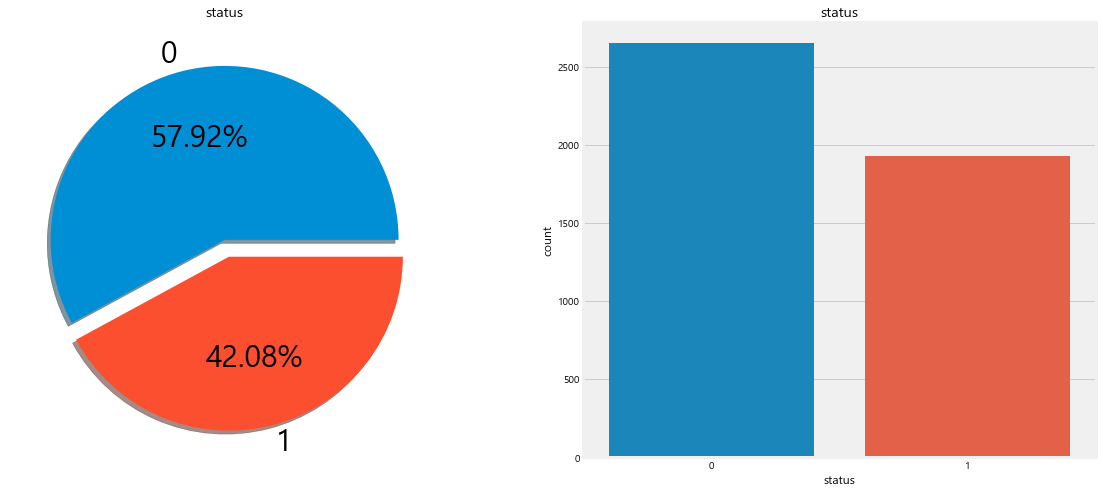

In [48]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df['status'].value_counts().plot.pie(explode = [0, 0.1],
                                     autopct = '%1.2f%%', 
                                     ax = ax[0], 
                                     shadow = True, 
                                     textprops = {'fontsize': 30})
ax[0].set_title('status')
ax[0].set_ylabel('')
sns.countplot('status', data = df, ax = ax[1])
ax[1].set_title('status')
plt.show()

## 3.1. city (도시)

In [49]:
df[["city"]]

,city
0,안양시
1,시흥시
2,용인시
3,안양시
4,파주시
...,...
4574,화성시
4575,화성시
4576,화성시
4577,화성시


### countplot

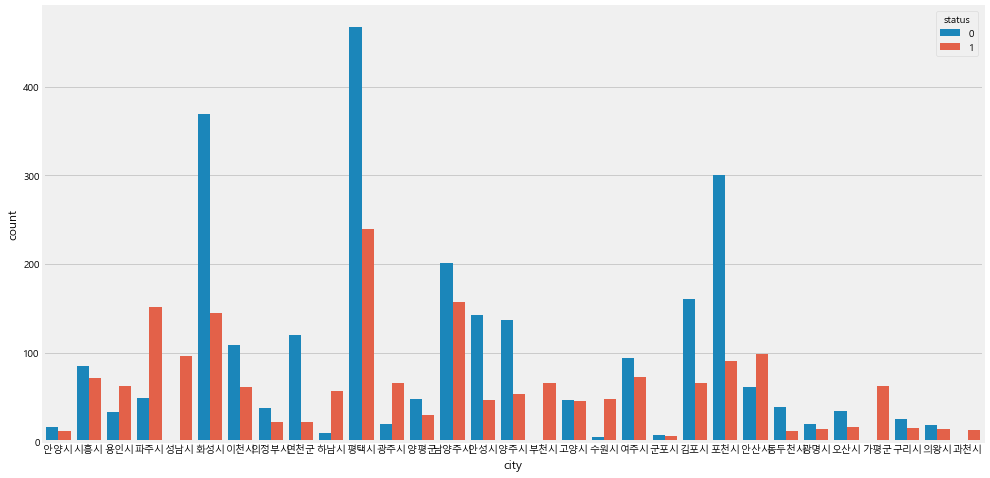

In [50]:
plt.figure(figsize = (15,8))

sns.countplot(x = "city", hue = "status", data = df)
plt.show()

실패가 월등히 높은 도시는 화성, 평택, 남양주, 김포, 포천 이다
성공이 가장 높은 도시는 평택이다  

In [51]:
df[["city"]].value_counts()

city
평택시     706
화성시     514
포천시     391
남양주시    358
김포시     226
파주시     200
양주시     190
안성시     188
이천시     169
여주시     166
안산시     159
시흥시     156
연천군     142
성남시      96
용인시      95
고양시      92
광주시      85
양평군      78
부천시      67
하남시      66
가평군      62
의정부시     60
수원시      53
오산시      50
동두천시     50
구리시      40
광명시      33
의왕시      32
안양시      28
과천시      14
군포시      13
dtype: int64

평택과 화성 포천이 가장 많은 수의 유기견을 보호하고 있는데 이곳이 실패 수가 많았다

### 도시별 입양 성공, 실패 및 그 비율 확인

In [52]:
df_city = df[["city"]]
df_city = df_city.drop_duplicates()
df_city.reset_index(inplace = True)
df_city.drop(["index"], axis = 1, inplace = True)
df_city["success"] = 0
df_city["fail"] = 0


for i in df.index :
    for j in df_city.index :
        if df.loc[i]["city"] == df_city.loc[j]["city"] :
            if df.loc[i]["status"] == 1 :
                df_city.at[j,"success"] = df_city.loc[j]["success"] + 1
            else :
                df_city.at[j,"fail"] = df_city.loc[j]["fail"] + 1

                
df_city["total"] = df_city["success"] + df_city["fail"]
df_city["success_ratio"] = df_city["success"]/df_city["total"]

df_city

,city,success,fail,total,success_ratio
0,안양시,12,16,28,0.428571
1,시흥시,71,85,156,0.455128
2,용인시,62,33,95,0.652632
3,파주시,151,49,200,0.755000
4,성남시,96,0,96,1.000000
5,화성시,145,369,514,0.282101
6,이천시,61,108,169,0.360947
7,의정부시,22,38,60,0.366667
8,연천군,22,120,142,0.154930
9,하남시,57,9,66,0.863636


In [53]:
df_city.sort_values(by=['success_ratio'], ascending=[False]).head(10)

,city,success,fail,total,success_ratio
4,성남시,96,0,96,1.000000
27,가평군,62,0,62,1.000000
16,부천시,66,1,67,0.985075
30,과천시,13,1,14,0.928571
18,수원시,48,5,53,0.905660
9,하남시,57,9,66,0.863636
11,광주시,66,19,85,0.776471
3,파주시,151,49,200,0.755000
2,용인시,62,33,95,0.652632
23,안산시,98,61,159,0.616352


In [54]:
df_city.sort_values(by=['total'], ascending=[False]).head(10)

,city,success,fail,total,success_ratio
10,평택시,239,467,706,0.338527
5,화성시,145,369,514,0.282101
22,포천시,91,300,391,0.232737
13,남양주시,157,201,358,0.438547
21,김포시,66,160,226,0.292035
3,파주시,151,49,200,0.755000
15,양주시,53,137,190,0.278947
14,안성시,46,142,188,0.244681
6,이천시,61,108,169,0.360947
19,여주시,72,94,166,0.433735


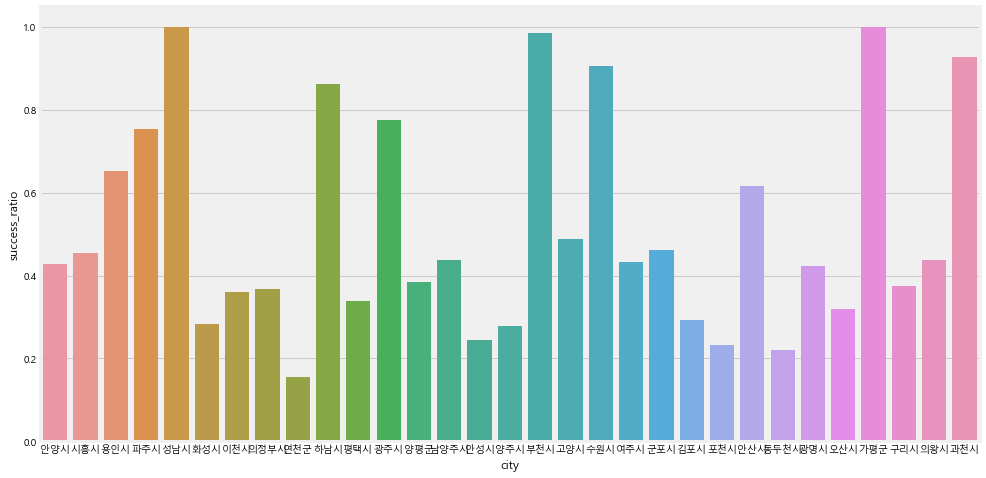

In [55]:
plt.figure(figsize = (15,8))
sns.barplot(x = "city", y = "success_ratio", data = df_city)

plt.show()

유기견이 발견된 도시의 경우 어느정도 특성이 보이지만
일반적으로 발견된 장소가 유기견 입양 성공에 영향을 미치지 못한다.
따라서 삭제한다.

### city column 삭제

In [56]:
df.drop(["city"], axis = 1, inplace = True)

In [57]:
df.columns

Index(['received_date', 'found_place', 'announcement_start_date',
       'announcement_end_date', 'breed', 'color', 'age', 'weight', 'sex',
       'is_neutered', 'characteristic', 'shelter_name', 'jurisdiction_city',
       'uniqueness', 'WGS84_latitude', 'WGS84_longitude', 'status'],
      dtype='object')

## 3.2. date (날짜) (현진)
received_date (접수 날짜)     
announcement_start_date (공고 시작 날짜)     
announcement_end_date (공고 종료 날짜)    

In [58]:
df_date = df[['received_date', 'announcement_start_date', 'announcement_end_date', 'status']]
df_date

,received_date,announcement_start_date,announcement_end_date,status
0,2021-07-02,2021-07-02,2021-07-12,0
1,2021-07-01,2021-07-01,2021-07-13,0
2,2021-06-25,2021-06-25,2021-07-05,0
3,2021-06-22,2021-06-22,2021-07-04,0
4,2021-06-22,2021-06-22,2021-07-02,0
...,...,...,...,...
4574,2021-01-05,2021-01-05,2021-01-14,0
4575,2021-01-05,2021-01-05,2021-01-14,0
4576,2021-01-05,2021-01-05,2021-01-14,0
4577,2021-01-05,2021-01-05,2021-01-14,0


### 3.2.1. received_date (접수 날짜)

In [59]:
df_date['received_date'].value_counts()

2021-03-08    89
2021-01-05    83
2021-03-02    79
2021-02-15    68
2021-02-23    68
2021-02-05    54
2021-02-22    54
2021-02-09    54
2021-04-30    54
2021-02-24    52
2021-01-21    51
2021-02-25    51
2021-05-27    50
2021-03-19    49
2021-03-26    49
2021-04-19    49
2021-03-11    49
2021-03-12    49
2021-02-01    48
2021-04-09    48
2021-03-15    47
2021-04-20    45
2021-02-26    45
2021-01-26    45
2021-05-18    45
2021-03-10    44
2021-03-23    44
2021-05-03    44
2021-03-03    43
2021-01-25    43
2021-01-13    43
2021-05-07    42
2021-03-29    42
2021-05-31    42
2021-01-18    41
2021-02-02    40
2021-03-04    40
2021-01-08    39
2021-01-23    39
2021-04-13    39
2021-03-27    38
2021-03-05    38
2021-01-27    38
2021-01-12    38
2021-03-24    37
2021-02-19    37
2021-03-16    36
2021-02-27    36
2021-05-24    36
2021-02-17    36
2021-06-02    35
2021-04-05    35
2021-03-30    35
2021-05-17    35
2021-05-13    35
2021-04-15    34
2021-02-10    33
2021-03-31    33
2021-04-29    

#### kdeplot

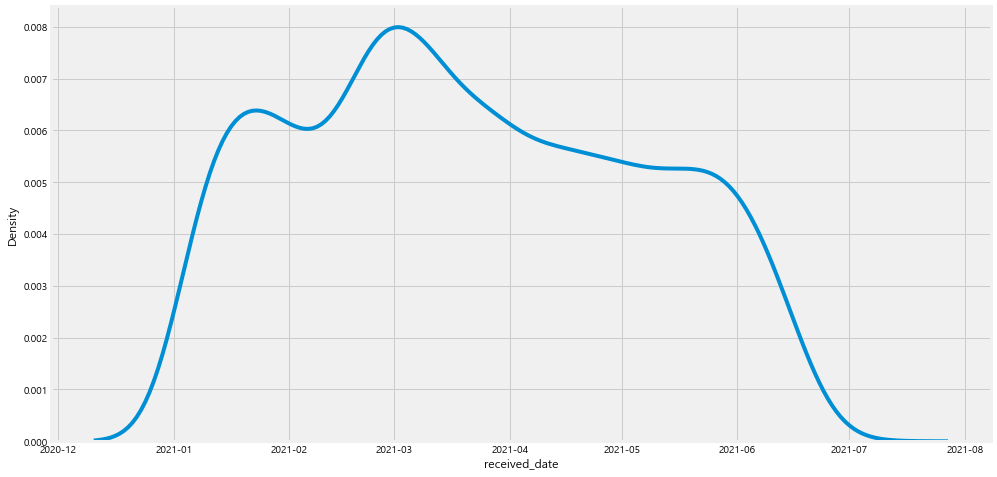

In [60]:
plt.figure(figsize = (15,8))
sns.kdeplot(data=df_date, x='received_date')
plt.show()

#### kdeplot (hue = status)

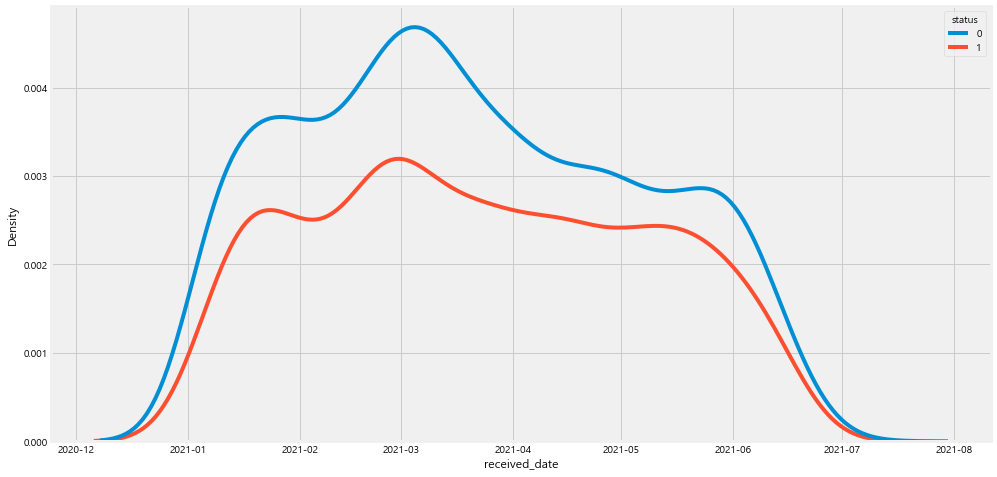

In [61]:
plt.figure(figsize = (15,8))
sns.kdeplot(data=df_date, x='received_date', hue='status')
plt.show()

#### catplot

<Figure size 1080x576 with 0 Axes>

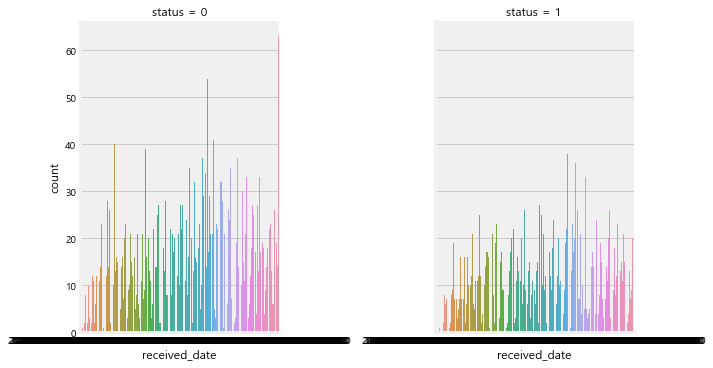

In [62]:
plt.figure(figsize = (15,8))
g = sns.catplot(data=df_date, x="received_date", col="status", kind="count")
plt.show()

### 3.2.2. announcement_start_date (공고시작일자)

In [63]:
df_date['announcement_start_date'].value_counts()

2021-03-15    102
2021-03-08     92
2021-02-15     81
2021-03-02     80
2021-02-23     66
2021-01-25     66
2021-03-05     64
2021-02-05     63
2021-03-19     60
2021-01-05     55
2021-04-20     53
2021-02-25     52
2021-05-27     52
2021-02-01     50
2021-02-22     49
2021-02-24     48
2021-03-29     47
2021-01-08     47
2021-05-03     46
2021-02-19     46
2021-01-26     45
2021-03-26     45
2021-06-03     45
2021-01-15     45
2021-03-09     44
2021-05-31     44
2021-01-18     44
2021-02-02     43
2021-04-09     43
2021-04-29     43
2021-05-10     42
2021-02-16     41
2021-03-24     41
2021-05-18     41
2021-02-10     41
2021-05-12     40
2021-03-22     40
2021-05-20     40
2021-03-03     40
2021-03-27     39
2021-04-16     39
2021-05-13     38
2021-04-30     38
2021-03-12     37
2021-01-28     37
2021-05-04     37
2021-04-07     36
2021-03-11     36
2021-02-26     36
2021-01-12     36
2021-04-19     36
2021-02-09     35
2021-02-08     35
2021-06-07     34
2021-05-25     34
2021-03-23

#### kdeplot

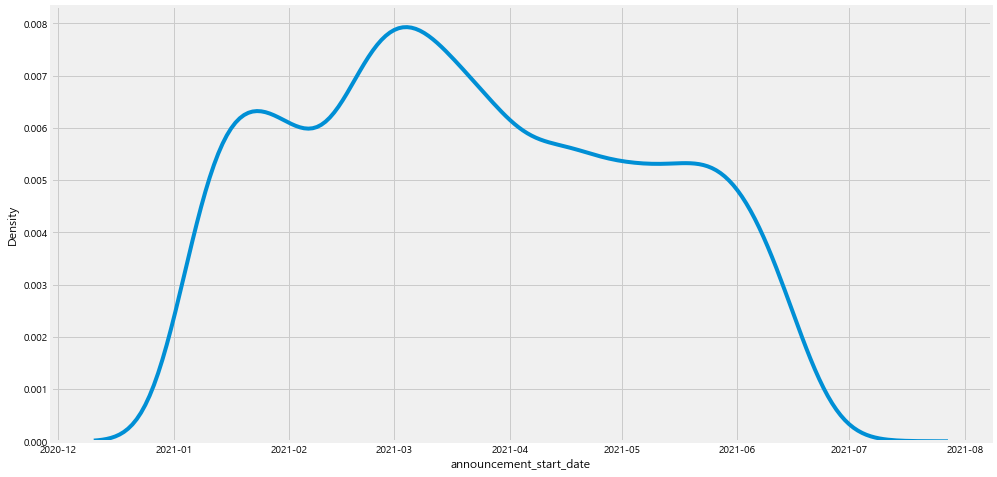

In [64]:
plt.figure(figsize = (15,8))
sns.kdeplot(data=df_date, x='announcement_start_date')
plt.show()

#### kdeplot (hue = status)

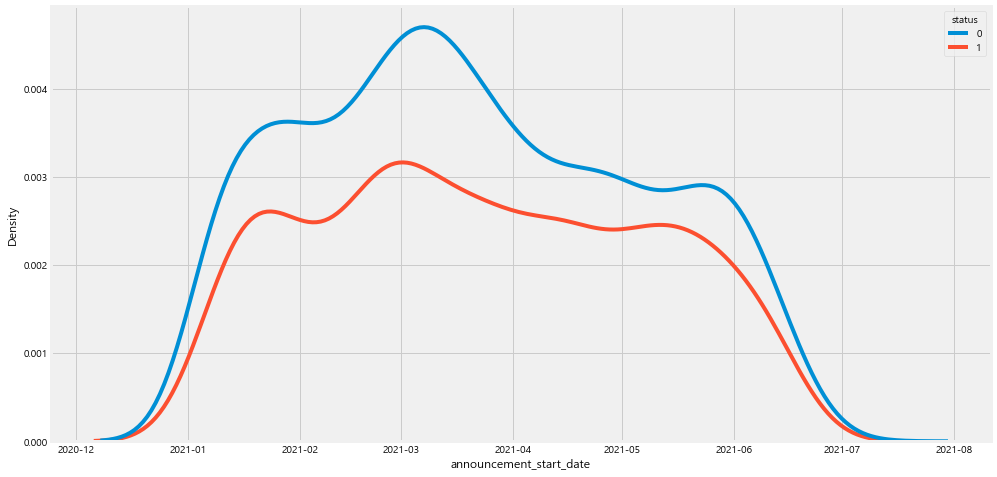

In [65]:
plt.figure(figsize = (15,8))
sns.kdeplot(data=df_date, x='announcement_start_date', hue='status')
plt.show()

### 3.2.3. announcement_end_date (공고종료일자)

In [66]:
df_date['announcement_end_date'].value_counts()

2021-02-15    192
2021-03-15    137
2021-03-08    122
2021-03-02    112
2021-04-05    105
2021-04-26    103
2021-01-18    103
2021-05-10    101
2021-06-07    100
2021-03-29    100
2021-04-19     97
2021-03-22     96
2021-03-25     96
2021-02-01     92
2021-05-24     91
2021-01-25     91
2021-04-12     89
2021-06-14     88
2021-03-18     82
2021-05-31     80
2021-02-25     79
2021-05-03     79
2021-03-12     78
2021-02-08     78
2021-06-21     69
2021-03-05     67
2021-02-04     66
2021-03-04     55
2021-05-17     54
2021-02-22     48
2021-05-13     47
2021-04-30     47
2021-01-21     47
2021-05-20     46
2021-03-19     46
2021-04-01     46
2021-02-05     45
2021-01-15     43
2021-04-06     41
2021-04-08     41
2021-06-10     40
2021-02-18     39
2021-02-26     39
2021-05-28     37
2021-04-29     37
2021-06-04     37
2021-01-28     34
2021-05-14     31
2021-04-15     31
2021-06-28     31
2021-05-06     30
2021-01-26     29
2021-05-27     28
2021-02-19     28
2021-06-17     28
2021-03-09

#### kdeplot

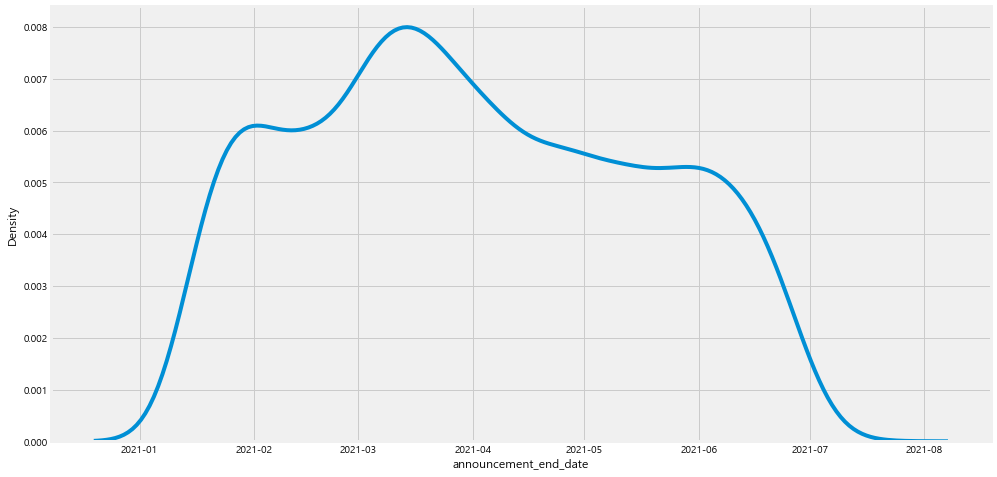

In [67]:
plt.figure(figsize = (15,8))
sns.kdeplot(data=df_date, x='announcement_end_date')
plt.show()

#### kdeplot (hue = status)

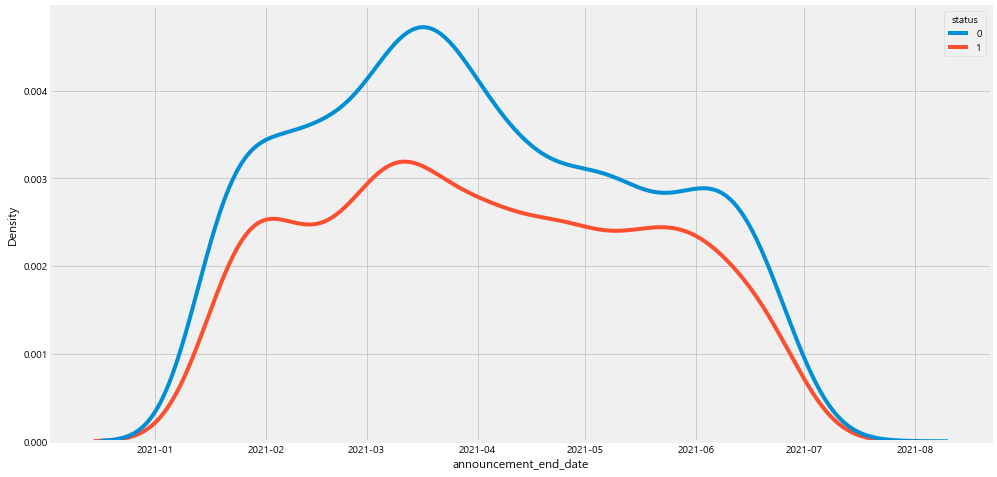

In [68]:
plt.figure(figsize = (15,8))
sns.kdeplot(data=df_date, x='announcement_end_date', hue='status')
plt.show()

날짜의 경우 그래프에서 큰 의미가 보이지 않으며
시계열 데이터를 classification 에 사용하는 것은 맞지 않는 것으로
생각 되어 삭제한다.

### date 관련 컬럼 삭제
'received_date', 'announcement_start_date', 'announcement_end_date'

In [69]:
df.drop(['received_date', 'announcement_start_date', 'announcement_end_date'], axis = 1, inplace = True)
df.columns

Index(['found_place', 'breed', 'color', 'age', 'weight', 'sex', 'is_neutered',
       'characteristic', 'shelter_name', 'jurisdiction_city', 'uniqueness',
       'WGS84_latitude', 'WGS84_longitude', 'status'],
      dtype='object')

## 3.3. found_place (발견 위치) (현진)

In [70]:
df_found_place = df[['found_place','status']]
df_found_place

,found_place,status
0,안양동 1336-1 부근,0
1,신천동 산18-2 부근,0
2,처인구 원삼면 원양로279-17,0
3,장내로100번길23-1 부근,0
4,부대 관사,0
...,...,...
4574,마도면 청원리 304-1 세진메탈,0
4575,마도면 청원리 304-1 세진메탈,0
4576,마도면 청원리 304-1 세진메탈,0
4577,마도면 청원리 304-1 세진메탈,0


In [71]:
df_found_place['found_place'].isnull().sum()

0

In [72]:
df_found_place['found_place'].nunique()

2651

In [73]:
df_found_place.groupby('status')['found_place'].nunique()

status
0    1543
1    1350
Name: found_place, dtype: int64

found_place(발견 장소)의 경우 문자열 데이터로          
unique한 값이 2651개 이므로 사용할 수 없다           
따라서 삭제한다

### found_place 컬럼 삭제

In [74]:
df.drop(["found_place"], axis = 1, inplace = True)

## 3.4. breed (개 품종) (진영)

In [75]:
df_breed=df[['breed', 'status']]
df_breed

,breed,status
0,믹스견,0
1,믹스견,0
2,믹스견,0
3,믹스견,0
4,믹스견,0
...,...,...
4574,믹스견,0
4575,믹스견,0
4576,믹스견,0
4577,믹스견,0


In [76]:
df_breed["breed"].isnull().sum()

0

In [77]:
df_breed["breed"].value_counts()

믹스견             3737
말티즈              135
푸들               113
진도견               69
포메라니안             60
라브라도 리트리버         38
풍산견               36
치와와               35
스피츠               34
시츄                28
웰시 코기 펨브로크        23
비숑 프리제            23
골든 리트리버           22
프렌치 불독            16
요크셔 테리어           14
시바                14
시베리안 허스키          12
닥스훈트              12
보더 콜리             12
코카 스파니엘           12
미니어쳐 핀셔           10
보스턴 테리어            9
불독                 8
사모예드               7
미디엄 푸들             5
복서                 5
알라스칸 말라뮤트          5
페키니즈               5
비글                 5
토이 푸들              4
샤페이                4
포인터                4
삽살개                3
퍼그                 3
슈나우져               3
도베르만               3
차우차우               3
도사                 3
셰퍼드                3
잉글리쉬 세터            3
그레이트 피레니즈          3
말라뮤트               2
스탠다드 푸들            2
이탈리안 그레이 하운드       2
동경견                2
코리아 트라이 하운드        2
셔틀랜드 쉽독            2
롯트와일러        

In [78]:
len(df_breed["breed"].value_counts())

70

In [79]:
df_breed_top6 = df_breed["breed"].value_counts().head(6)

<AxesSubplot:>

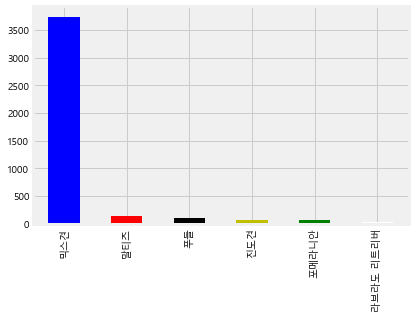

In [80]:
df_breed_top6.plot.bar(color=['b', 'r', 'k', 'y', 'green', 'w'])

In [81]:
df_breed_top5 = df_breed_top6.drop("믹스견")

<AxesSubplot:>

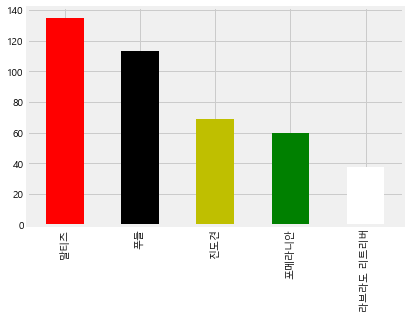

In [82]:
df_breed_top5.plot.bar(color=['r', 'k', 'y', 'green', 'w'])

<AxesSubplot:xlabel='breed', ylabel='count'>

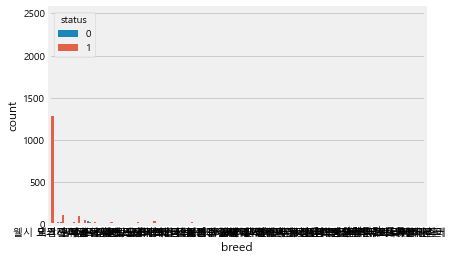

In [83]:
sns.countplot(data=df_breed, x='breed', hue='status')

품종이 많은데 다쓰기 어려워서 상위 5개만 쓰곘다

### 믹스견과 상위 5개의 품종 확인

In [84]:
print(df['breed'].value_counts().index[:6].values)

['믹스견' '말티즈' '푸들' '진도견' '포메라니안' '라브라도 리트리버']


### 믹스견과 상위 5개의 품종만 추출

In [85]:
df = df[df["breed"].isin(df['breed'].value_counts().index[:6])]
df["breed"].value_counts()

믹스견          3737
말티즈           135
푸들            113
진도견            69
포메라니안          60
라브라도 리트리버      38
Name: breed, dtype: int64

### 더미 변수화

In [86]:
df = pd.get_dummies(df, columns = ["breed"])
df.columns

Index(['color', 'age', 'weight', 'sex', 'is_neutered', 'characteristic',
       'shelter_name', 'jurisdiction_city', 'uniqueness', 'WGS84_latitude',
       'WGS84_longitude', 'status', 'breed_라브라도 리트리버', 'breed_말티즈',
       'breed_믹스견', 'breed_진도견', 'breed_포메라니안', 'breed_푸들'],
      dtype='object')

## 3.5. color (색상) (진영)

In [87]:
df_color=df[['color', 'status']]
df_color

,color,status
0,white,0
1,mix,0
2,brown,0
3,black,0
4,brown,0
...,...,...
4574,white,0
4575,white,0
4576,white,0
4577,white,0


In [88]:
df_color["color"].isnull().sum()

0

In [89]:
df_color["color"].value_counts()

white     1659
mix       1152
brown      845
black      338
yellow     158
Name: color, dtype: int64

(array([1659.,    0., 1152.,    0.,  845.,    0.,  338.,    0.,  158.]),
 array([0.        , 0.44444444, 0.88888889, 1.33333333, 1.77777778,
        2.22222222, 2.66666667, 3.11111111, 3.55555556, 4.        ]),
 <BarContainer object of 9 artists>)

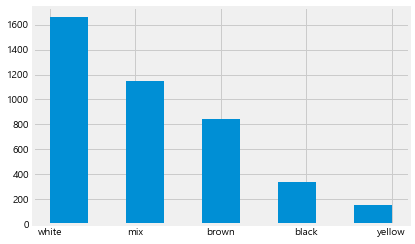

In [90]:
plt.hist(df_color["color"], bins=9)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'white'),
  Text(1, 0, 'mix'),
  Text(2, 0, 'brown'),
  Text(3, 0, 'black'),
  Text(4, 0, 'yellow')])

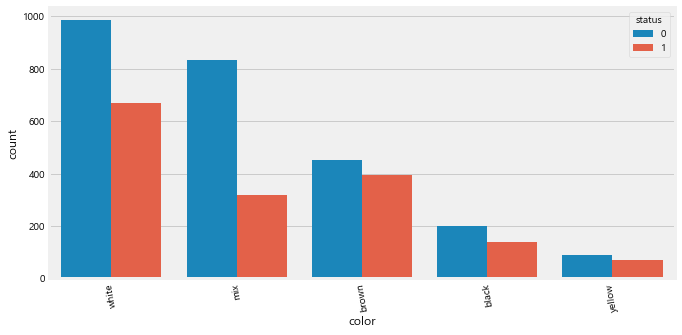

In [91]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_color, x='color', hue='status')
plt.xticks(rotation=100)

### 더미변수화

In [92]:
df = pd.get_dummies(df, columns = ["color"])
df.columns

Index(['age', 'weight', 'sex', 'is_neutered', 'characteristic', 'shelter_name',
       'jurisdiction_city', 'uniqueness', 'WGS84_latitude', 'WGS84_longitude',
       'status', 'breed_라브라도 리트리버', 'breed_말티즈', 'breed_믹스견', 'breed_진도견',
       'breed_포메라니안', 'breed_푸들', 'color_black', 'color_brown', 'color_mix',
       'color_white', 'color_yellow'],
      dtype='object')

## 3.6. age (나이) (세정)

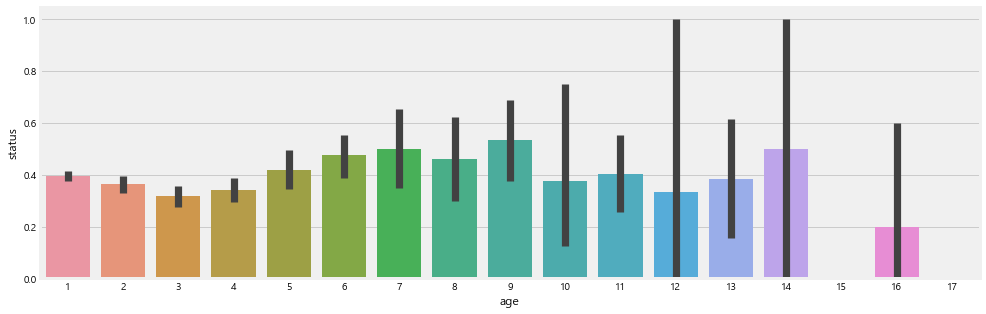

In [93]:
plt.figure(figsize=(15,5))
sns.barplot(x='age',y='status',data=df)

plt.show()

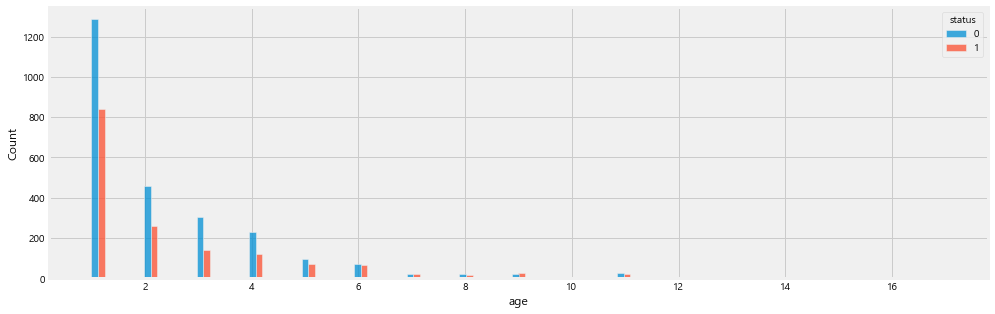

In [94]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="age", hue="status" ,multiple="dodge")

plt.show()

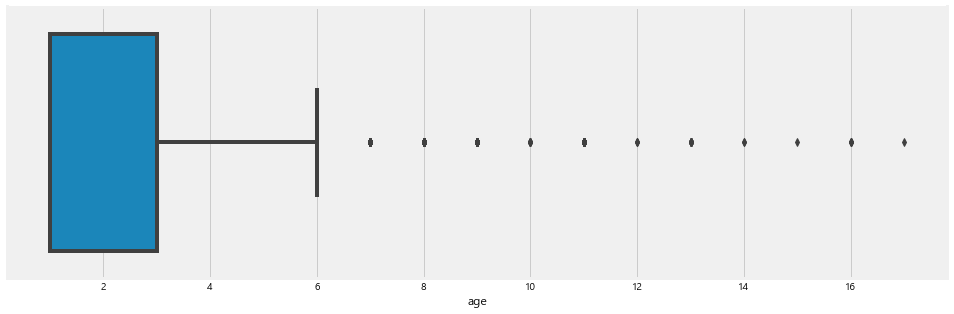

In [95]:
plt.figure(figsize=(15,5))
sns.boxplot(x = "age", data = df)

plt.show()

## 3.7. weight (무게) (현진)

In [96]:
df_weight = df[['weight', 'status']]
df_weight

,weight,status
0,4.00,0
1,12.00,0
2,4.65,0
3,4.50,0
4,5.80,0
...,...,...
4574,1.00,0
4575,1.00,0
4576,1.00,0
4577,1.00,0


### boxplot

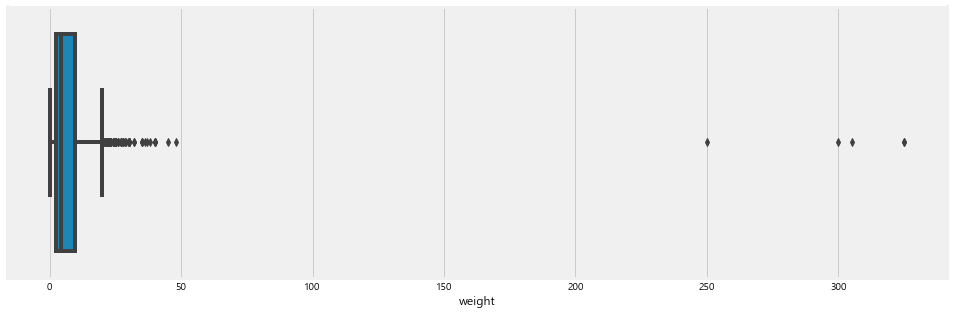

In [97]:
plt.figure(figsize=(15,5))
sns.boxplot(x = "weight", data = df_weight)

plt.show()

### 몸무게 이상치 제거

<AxesSubplot:xlabel='weight'>

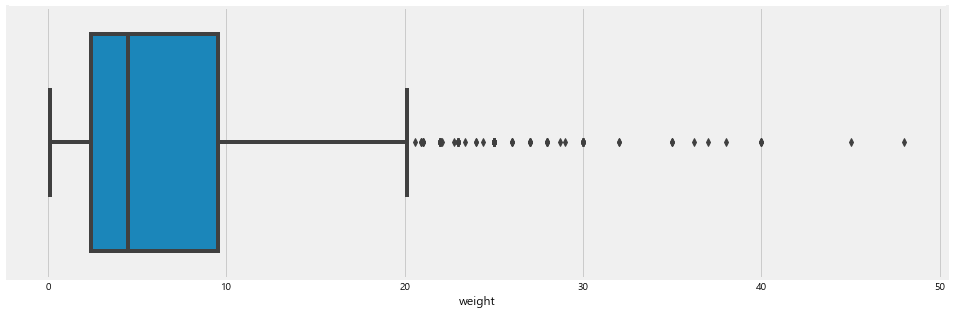

In [98]:
plt.figure(figsize=(15,5))
sns.boxplot(x = "weight", data = df_weight[df_weight["weight"]< 100])

In [99]:
weight_Q1 = np.percentile(df_weight["weight"], 25) 
weight_Q3 = np.percentile(df_weight["weight"], 75)
weight_IQR = weight_Q3 - weight_Q1

weight_upper = weight_Q3 + 1.5 * weight_IQR

if weight_Q1 - 1.5 * weight_IQR <= 0 :
    weight_lower = 0
else :
    weight_lower = weight_Q1 - 1.5 * weight_IQR
    
print("최대 :", weight_upper, "  최소 :", weight_lower)

최대 : 20.4   최소 : 0


In [100]:
print(len(df))
print(len(df[df["weight"] >= weight_upper]))

plt.show()

4152
134


In [101]:
df = df[df["weight"] <= weight_upper]
len(df)

plt.show()

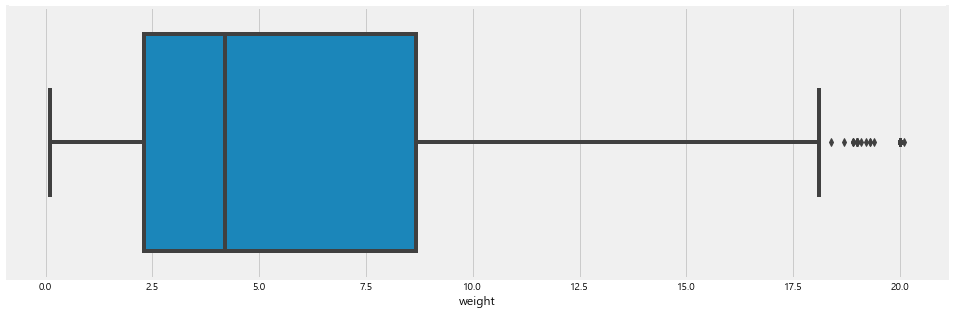

In [102]:
plt.figure(figsize=(15,5))

df_weight = df[['weight', 'status']]
sns.boxplot(x = "weight", data = df_weight)

plt.show()

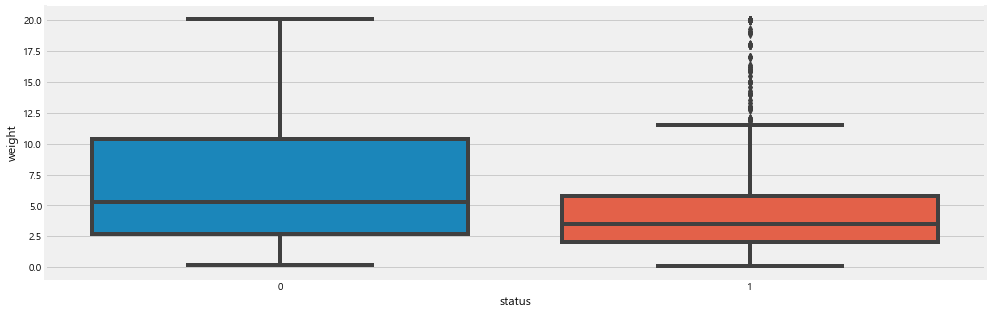

In [103]:
plt.figure(figsize=(15,5))

sns.boxplot(x = "status", y = "weight", data = df_weight)

plt.show()

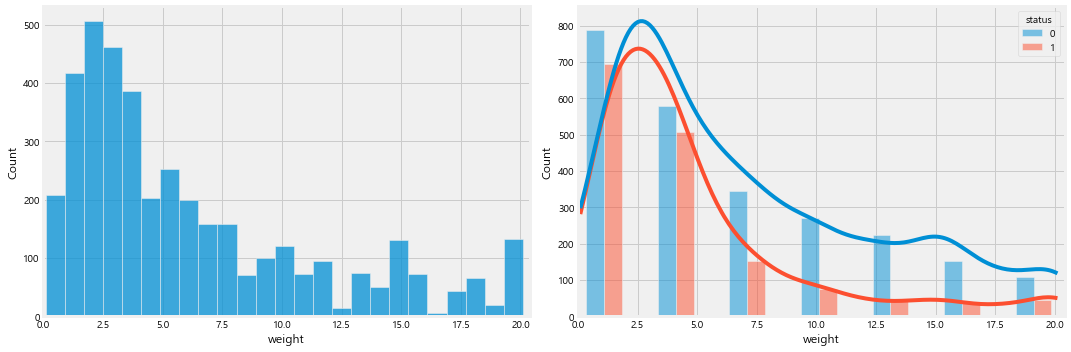

In [104]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.histplot(data=df_weight, x="weight")
plt.xlim([weight_lower, weight_upper]) 
plt.subplot(122)
sns.histplot(data=df_weight, x="weight", shrink=.5, hue="status", multiple="dodge", binwidth=3, kde=True)
plt.xlim([weight_lower, weight_upper]) 

plt.tight_layout()

plt.show()

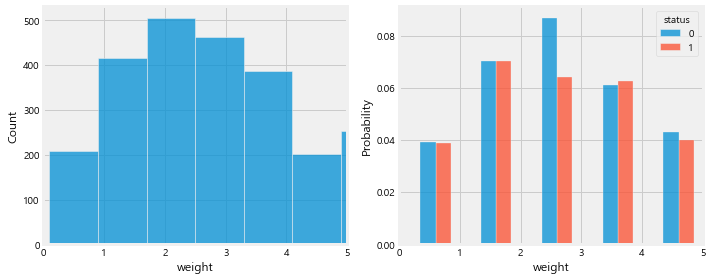

In [105]:
plt.figure(figsize=(10,4))

plt.subplot(121)
sns.histplot(data=df_weight, x="weight")
plt.xlim([0, 5]) 
plt.subplot(122)
sns.histplot(data=df_weight, x="weight", shrink=.5, hue="status", multiple="dodge", stat='probability',binwidth=1)
plt.xlim([0,5]) 

plt.tight_layout()
plt.show()

## 3.8. sex (성별) (세정)

In [106]:
df['sex'].value_counts() 

F    2040
M    1958
Q      20
Name: sex, dtype: int64

In [107]:
df = df[df['sex'] != "Q"]
df['sex'].value_counts() 

F    2040
M    1958
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='status'>

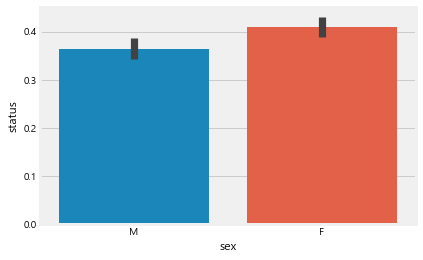

In [108]:
sns.barplot(x='sex',y='status',data=df)

<AxesSubplot:xlabel='sex', ylabel='count'>

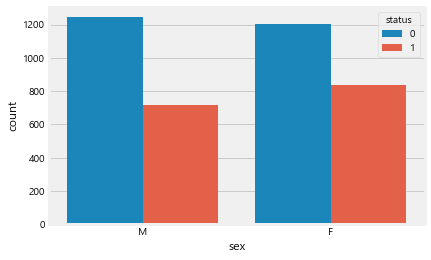

In [109]:
sns.countplot('sex', hue='status' , data=df)

### 더미변수화

In [110]:
df = pd.get_dummies(df, columns = ["sex"])
df.columns

Index(['age', 'weight', 'is_neutered', 'characteristic', 'shelter_name',
       'jurisdiction_city', 'uniqueness', 'WGS84_latitude', 'WGS84_longitude',
       'status', 'breed_라브라도 리트리버', 'breed_말티즈', 'breed_믹스견', 'breed_진도견',
       'breed_포메라니안', 'breed_푸들', 'color_black', 'color_brown', 'color_mix',
       'color_white', 'color_yellow', 'sex_F', 'sex_M'],
      dtype='object')

## 3.9. is_neutered (중성화 여부)

In [111]:
df_is_neutered = df[['is_neutered', 'status']]
df_is_neutered

,is_neutered,status
0,N,0
1,U,0
2,N,0
3,N,0
4,N,0
...,...,...
4574,N,0
4575,N,0
4576,N,0
4577,N,0


In [112]:
df_is_neutered['is_neutered'].value_counts()

N    3026
U     874
Y      98
Name: is_neutered, dtype: int64

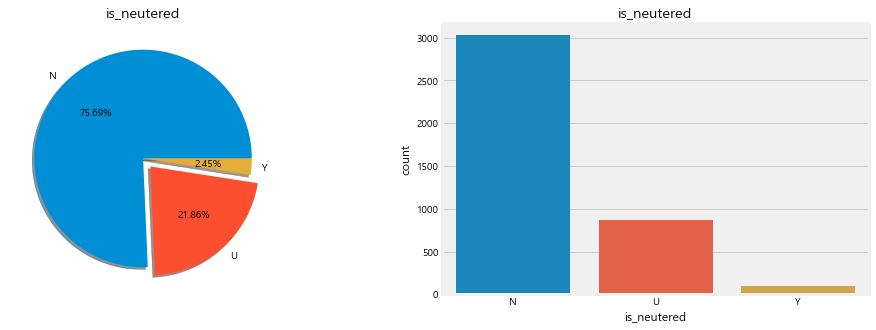

In [113]:
f, ax = plt.subplots(1, 2, figsize = (15, 5))
df_is_neutered['is_neutered'].value_counts().plot.pie(explode = [0, 0.1, 0],
                                                      autopct = '%1.2f%%', 
                                                      ax = ax[0], shadow = True)
ax[0].set_title('is_neutered')
ax[0].set_ylabel('')
sns.countplot('is_neutered', data = df_is_neutered, ax = ax[1])
ax[1].set_title('is_neutered')
plt.show()

<AxesSubplot:xlabel='is_neutered', ylabel='count'>

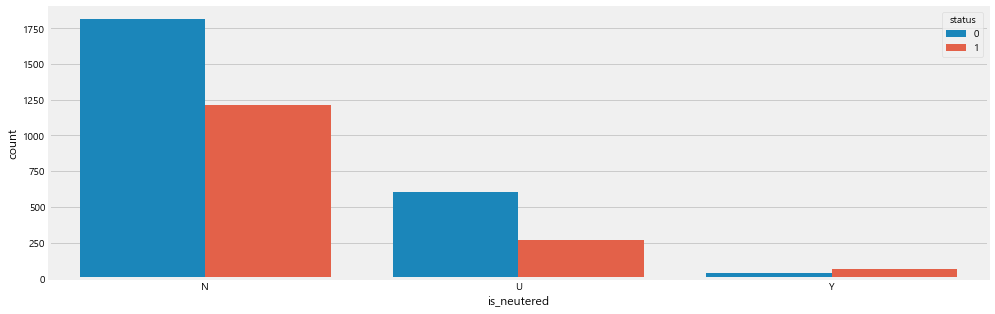

In [114]:
plt.figure(figsize=(15,5))

sns.countplot(x = 'is_neutered', data = df_is_neutered, hue = "status")

### 더미변수화

In [115]:
df = pd.get_dummies(df, columns = ["is_neutered"])
df.columns

Index(['age', 'weight', 'characteristic', 'shelter_name', 'jurisdiction_city',
       'uniqueness', 'WGS84_latitude', 'WGS84_longitude', 'status',
       'breed_라브라도 리트리버', 'breed_말티즈', 'breed_믹스견', 'breed_진도견', 'breed_포메라니안',
       'breed_푸들', 'color_black', 'color_brown', 'color_mix', 'color_white',
       'color_yellow', 'sex_F', 'sex_M', 'is_neutered_N', 'is_neutered_U',
       'is_neutered_Y'],
      dtype='object')

## 3.10. characteristic (특징)

In [116]:
len(df)

3998

In [117]:
df_characteristic = df[['characteristic', 'status']]
df_characteristic.value_counts()

characteristic                               status
없음                                           0         125
강아지                                          0          87
순함                                           1          58
어린강아지임                                       0          55
경계함                                          0          55
                                                      ... 
분홍하네스,겁많음, 주인사망                              1           1
분홍하네스/끊긴 빨간리드줄. 활발함/사람좋아함. 꼬리단미안됨. 털상태 양호.   0           1
붉은색 목걸이, 사슬목줄, 배회                            1           1
붉은색 목줄에 대양이라고 적혀있다. 매우순하고 파란목줄아이와 같이 구조되었다.  0           1
흰생 시골강아지                                     0           1
Length: 2520, dtype: int64

characteristic 은 문자열 데이터로           
총 4000여개의 데이터에 2600여개의 unique한 데이터가 있다.            
따라서 사용이 불가능 하므로 삭제한다.           

### characteristic 삭제

In [118]:
df.drop(["characteristic"], axis = 1, inplace = True)
df.columns

Index(['age', 'weight', 'shelter_name', 'jurisdiction_city', 'uniqueness',
       'WGS84_latitude', 'WGS84_longitude', 'status', 'breed_라브라도 리트리버',
       'breed_말티즈', 'breed_믹스견', 'breed_진도견', 'breed_포메라니안', 'breed_푸들',
       'color_black', 'color_brown', 'color_mix', 'color_white',
       'color_yellow', 'sex_F', 'sex_M', 'is_neutered_N', 'is_neutered_U',
       'is_neutered_Y'],
      dtype='object')

## 3.11. shelter_name (보호소 이름) (우재)

In [119]:
df[["shelter_name"]]

,shelter_name
0,한국야생동물보호협회
1,한국야생동물보호협회
2,용인시 동물보호센터
3,한국야생동물보호협회
4,버디종합동물병원
...,...
4574,남양유기견보호센터
4575,남양유기견보호센터
4576,남양유기견보호센터
4577,남양유기견보호센터


In [120]:
df[["shelter_name"]].value_counts()

shelter_name
한국동물구조관리협회      998
평택시유기동물보호소      637
남양유기견보호센터       449
한국야생동물보호협회      339
남양주동물보호협회       338
위더스 동물보호센터      258
이성준동물병원         174
용인시 동물보호센터       84
고양시동물보호센터        81
양평군유기동물보호소       76
펫토피아동물병원         75
하남동물병원           61
광주TNR동물병원초월      58
가평군유기동물보호소       55
오산시수의사회          43
수원시 동물보호센터       41
행복한동물병원          39
버디종합동물병원         37
파주독 애견호텔         35
나은동물병원           20
가나동물병원           19
로뎀동물병원           13
24시아이동물메디컬       12
웰니스클리닉           11
cj동물병원           10
파주24시동물병원         9
군포시청              6
가야동물병원            6
문산동물병원            4
금릉동물병원            3
부천시수의사회           3
미엘동물병원            2
의왕시청              1
가온동물병원            1
dtype: int64

### countplot

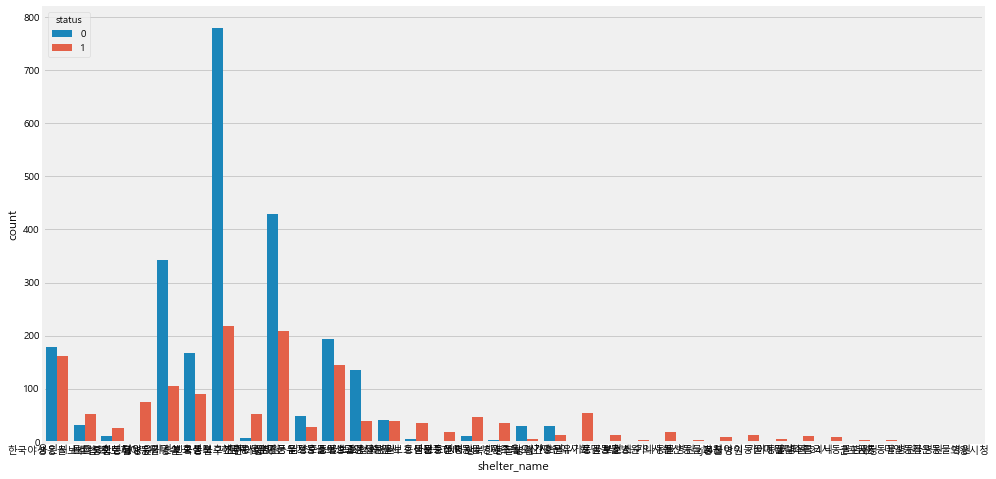

In [121]:
plt.figure(figsize = (15,8))

sns.countplot(x = "shelter_name", hue = "status", data = df)
plt.show()

### countplot - 상위 10개

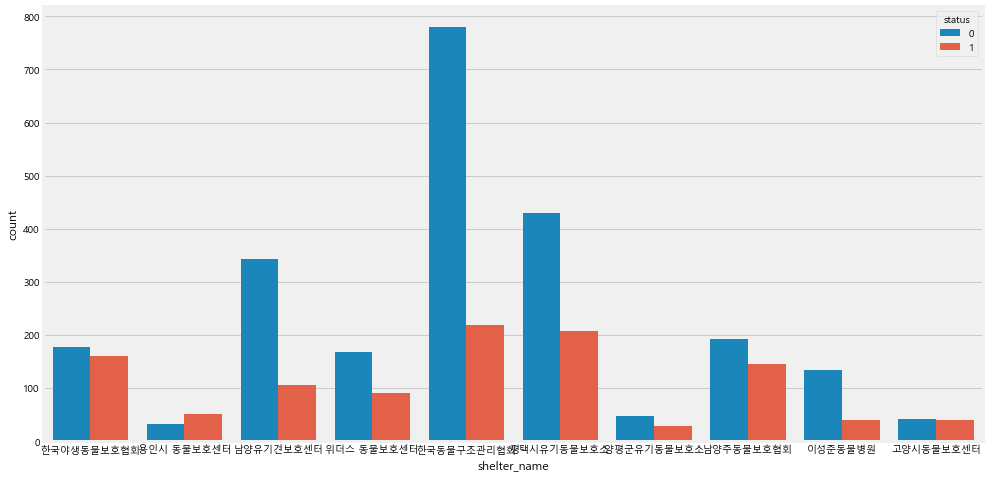

In [122]:
plt.figure(figsize = (15,8))

sns.countplot(x = "shelter_name", hue = "status", data = df[df["shelter_name"].isin(df['shelter_name'].value_counts().index[:10])])
plt.show()

### countplot - 하위 10개

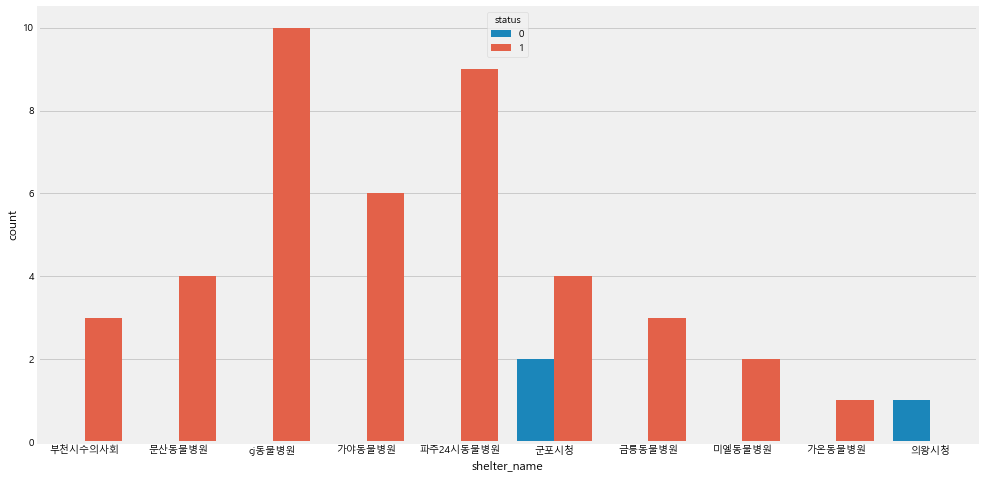

In [123]:
plt.figure(figsize = (15,8))

sns.countplot(x = "shelter_name", hue = "status", data = df[df["shelter_name"].isin(df['shelter_name'].value_counts().index[-10:])])
plt.show()

### 보호소 별 입양 성공, 실패 및 그 비율 확인

In [124]:
df_shelter_name = df[["shelter_name"]]
df_shelter_name = df_shelter_name.drop_duplicates()
df_shelter_name.reset_index(inplace = True)
df_shelter_name.drop(["index"], axis = 1, inplace = True)
df_shelter_name["success"] = 0
df_shelter_name["fail"] = 0


for i in df.index :
    for j in df_shelter_name.index :
        if df.loc[i]["shelter_name"] == df_shelter_name.loc[j]["shelter_name"] :
            if df.loc[i]["status"] == 1 :
                df_shelter_name.at[j,"success"] = df_shelter_name.loc[j]["success"] + 1
            else :
                df_shelter_name.at[j,"fail"] = df_shelter_name.loc[j]["fail"] + 1

                
df_shelter_name["total"] = df_shelter_name["success"] + df_shelter_name["fail"]
df_shelter_name["success_ratio"] = df_shelter_name["success"]/df_shelter_name["total"]

df_shelter_name

,shelter_name,success,fail,total,success_ratio
0,한국야생동물보호협회,161,178,339,0.474926
1,용인시 동물보호센터,52,32,84,0.619048
2,버디종합동물병원,26,11,37,0.702703
3,펫토피아동물병원,75,0,75,1.000000
4,남양유기견보호센터,106,343,449,0.236080
5,위더스 동물보호센터,90,168,258,0.348837
6,한국동물구조관리협회,218,780,998,0.218437
7,하남동물병원,53,8,61,0.868852
8,평택시유기동물보호소,208,429,637,0.326531
9,양평군유기동물보호소,28,48,76,0.368421


In [125]:
df_shelter_name.sort_values(by=['success_ratio'], ascending=[False]).head(10)

,shelter_name,success,fail,total,success_ratio
31,미엘동물병원,2,0,2,1.0
32,가온동물병원,1,0,1,1.0
30,금릉동물병원,3,0,3,1.0
3,펫토피아동물병원,75,0,75,1.0
28,파주24시동물병원,9,0,9,1.0
27,웰니스클리닉,11,0,11,1.0
26,가야동물병원,6,0,6,1.0
25,24시아이동물메디컬,12,0,12,1.0
24,cj동물병원,10,0,10,1.0
23,문산동물병원,4,0,4,1.0


In [126]:
df_shelter_name.sort_values(by=['total'], ascending=[False]).head(10)

,shelter_name,success,fail,total,success_ratio
6,한국동물구조관리협회,218,780,998,0.218437
8,평택시유기동물보호소,208,429,637,0.326531
4,남양유기견보호센터,106,343,449,0.236080
0,한국야생동물보호협회,161,178,339,0.474926
10,남양주동물보호협회,145,193,338,0.428994
5,위더스 동물보호센터,90,168,258,0.348837
11,이성준동물병원,39,135,174,0.224138
1,용인시 동물보호센터,52,32,84,0.619048
12,고양시동물보호센터,40,41,81,0.493827
9,양평군유기동물보호소,28,48,76,0.368421


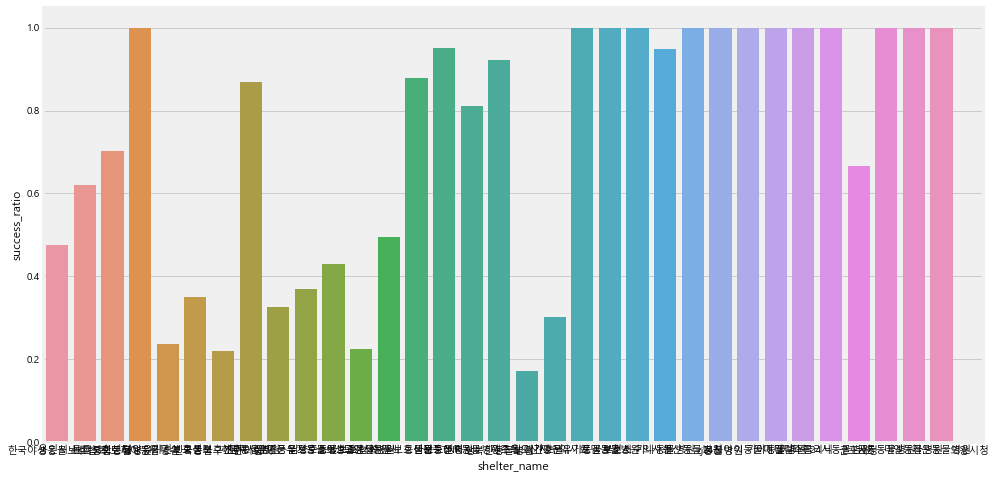

In [127]:
plt.figure(figsize = (15,8))
sns.barplot(x = "shelter_name", y = "success_ratio", data = df_shelter_name)

plt.show()

보호소의 경우 어느정도 특성이 보이지만     
데이터가 30여개의 unique한 값을 가지므로     
더미변수화에 대한 고민이 필요하다.         
      
따라서 해당 변수를 더미변수화해서 머신런닝을 돌리고     
빼고 머신러닝을 돌려보려 한다.    

## 3.12. jurisdiction_city (관할 도시)

In [128]:
df["jurisdiction_city"]

0       경기도 안양시
1       경기도 시흥시
2       경기도 용인시
3       경기도 안양시
4       경기도 파주시
         ...   
4574    경기도 화성시
4575    경기도 화성시
4576    경기도 화성시
4577    경기도 화성시
4578    경기도 화성시
Name: jurisdiction_city, Length: 3998, dtype: object

### 3,12 jurisdiction_city (관할 도시)는 필요 없으로 삭제한다.

In [129]:
df.drop(["jurisdiction_city"], axis = 1, inplace = True)
df.columns

Index(['age', 'weight', 'shelter_name', 'uniqueness', 'WGS84_latitude',
       'WGS84_longitude', 'status', 'breed_라브라도 리트리버', 'breed_말티즈',
       'breed_믹스견', 'breed_진도견', 'breed_포메라니안', 'breed_푸들', 'color_black',
       'color_brown', 'color_mix', 'color_white', 'color_yellow', 'sex_F',
       'sex_M', 'is_neutered_N', 'is_neutered_U', 'is_neutered_Y'],
      dtype='object')

## 3.13. uniqueness (특이 사항)

In [130]:
df["uniqueness"].value_counts()

공고후 안락사          14
공고후 안락사.          9
공고후안락사            4
공고후 입양.           3
공고후 자연사.          1
음낭주변 피부 상처        1
간헐적인 발작, 통증심함     1
간질 발작             1
공고후 안락사           1
구토, 설사            1
슬개골 탈구 3기         1
공고후               1
Name: uniqueness, dtype: int64

In [131]:
df["uniqueness"].isnull().sum()

3960

### uniqueness 컬럼 삭제

In [132]:
df.drop(["uniqueness"], axis = 1, inplace = True)
df.columns

Index(['age', 'weight', 'shelter_name', 'WGS84_latitude', 'WGS84_longitude',
       'status', 'breed_라브라도 리트리버', 'breed_말티즈', 'breed_믹스견', 'breed_진도견',
       'breed_포메라니안', 'breed_푸들', 'color_black', 'color_brown', 'color_mix',
       'color_white', 'color_yellow', 'sex_F', 'sex_M', 'is_neutered_N',
       'is_neutered_U', 'is_neutered_Y'],
      dtype='object')

## 3.14. latitude & longitude (위도와 경도) (세정)
WGS84_latitude (위도)      
WGS84_longitude (경도)

### 3.14.1. WGS84_latitude (위도)

<AxesSubplot:xlabel='WGS84_latitude', ylabel='Count'>

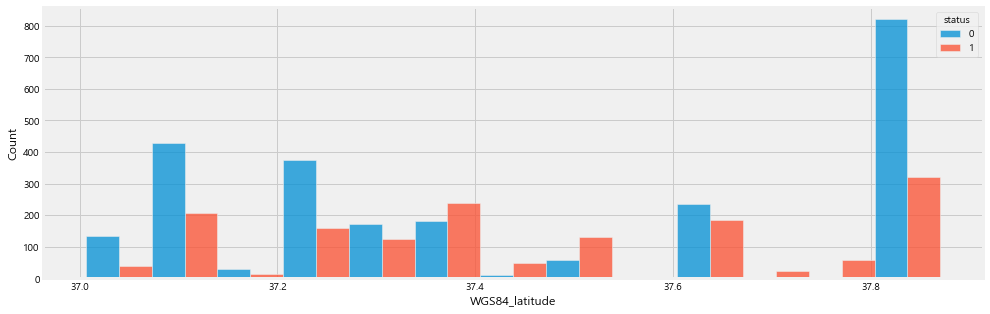

In [133]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="WGS84_latitude", hue="status" ,multiple="dodge")

<AxesSubplot:xlabel='WGS84_latitude', ylabel='status'>

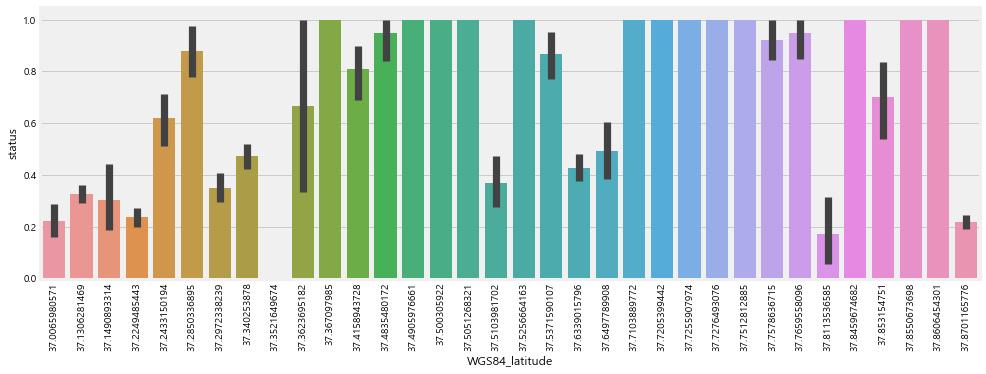

In [134]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.barplot(x='WGS84_latitude',y='status',data=df)

In [135]:
### 3.14.1. WGS84_latitude (위도)

<AxesSubplot:xlabel='WGS84_latitude', ylabel='Count'>

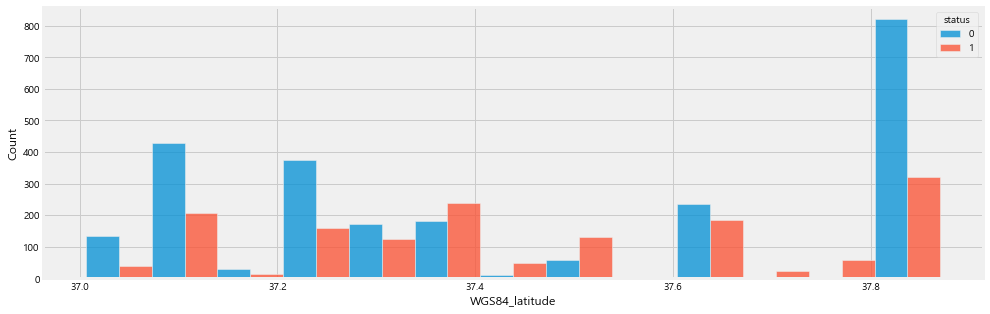

In [136]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="WGS84_latitude", hue="status" ,multiple="dodge")

<AxesSubplot:xlabel='WGS84_latitude', ylabel='status'>

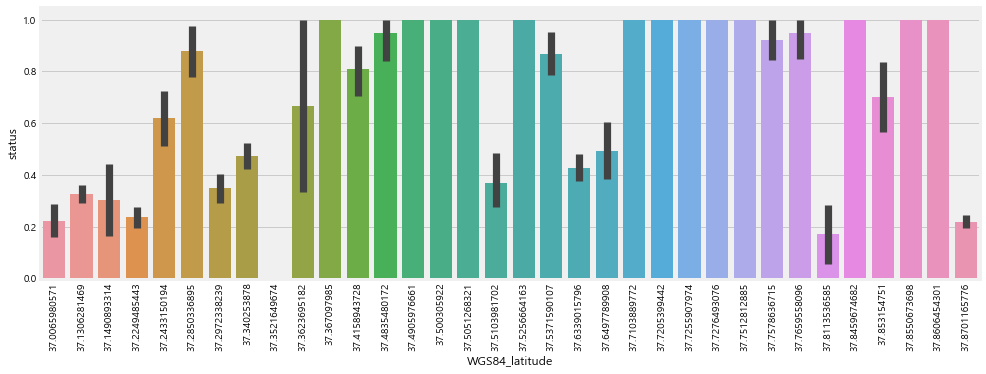

In [137]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.barplot(x='WGS84_latitude',y='status',data=df)

삭제

In [138]:
df.drop(["WGS84_latitude", "WGS84_longitude"], axis = 1, inplace = True)
df.columns

Index(['age', 'weight', 'shelter_name', 'status', 'breed_라브라도 리트리버',
       'breed_말티즈', 'breed_믹스견', 'breed_진도견', 'breed_포메라니안', 'breed_푸들',
       'color_black', 'color_brown', 'color_mix', 'color_white',
       'color_yellow', 'sex_F', 'sex_M', 'is_neutered_N', 'is_neutered_U',
       'is_neutered_Y'],
      dtype='object')

## 3.15 EDA & FE 2 마무리

In [139]:
df

,age,weight,shelter_name,status,breed_라브라도 리트리버,breed_말티즈,breed_믹스견,breed_진도견,breed_포메라니안,breed_푸들,color_black,color_brown,color_mix,color_white,color_yellow,sex_F,sex_M,is_neutered_N,is_neutered_U,is_neutered_Y
0,1,4.00,한국야생동물보호협회,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0
1,6,12.00,한국야생동물보호협회,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0
2,3,4.65,용인시 동물보호센터,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0
3,1,4.50,한국야생동물보호협회,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0
4,1,5.80,버디종합동물병원,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4574,1,1.00,남양유기견보호센터,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0
4575,1,1.00,남양유기견보호센터,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0
4576,1,1.00,남양유기견보호센터,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0
4577,1,1.00,남양유기견보호센터,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0


In [140]:
df.columns

Index(['age', 'weight', 'shelter_name', 'status', 'breed_라브라도 리트리버',
       'breed_말티즈', 'breed_믹스견', 'breed_진도견', 'breed_포메라니안', 'breed_푸들',
       'color_black', 'color_brown', 'color_mix', 'color_white',
       'color_yellow', 'sex_F', 'sex_M', 'is_neutered_N', 'is_neutered_U',
       'is_neutered_Y'],
      dtype='object')

In [141]:
df = df[['age', 'weight', 'shelter_name', 'color_black', 'color_brown',
        'color_mix', 'color_white', 'color_yellow', 'breed_라브라도 리트리버',
        'breed_말티즈', 'breed_믹스견', 'breed_진도견', 'breed_포메라니안', 'breed_푸들',
        'sex_F', 'sex_M', 'is_neutered_N', 'is_neutered_U', 'is_neutered_Y', 'status']]

df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)
df

,age,weight,shelter_name,color_black,color_brown,color_mix,color_white,color_yellow,breed_라브라도 리트리버,breed_말티즈,breed_믹스견,breed_진도견,breed_포메라니안,breed_푸들,sex_F,sex_M,is_neutered_N,is_neutered_U,is_neutered_Y,status
0,1,4.00,한국야생동물보호협회,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0
1,6,12.00,한국야생동물보호협회,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
2,3,4.65,용인시 동물보호센터,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
3,1,4.50,한국야생동물보호협회,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
4,1,5.80,버디종합동물병원,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,1,1.00,남양유기견보호센터,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0
3994,1,1.00,남양유기견보호센터,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0
3995,1,1.00,남양유기견보호센터,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0
3996,1,1.00,남양유기견보호센터,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0


# 4. EDA & FE 3 : 최종 정리

## 4.1. 데이터 재 확인

In [142]:
df

,age,weight,shelter_name,color_black,color_brown,color_mix,color_white,color_yellow,breed_라브라도 리트리버,breed_말티즈,breed_믹스견,breed_진도견,breed_포메라니안,breed_푸들,sex_F,sex_M,is_neutered_N,is_neutered_U,is_neutered_Y,status
0,1,4.00,한국야생동물보호협회,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0
1,6,12.00,한국야생동물보호협회,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
2,3,4.65,용인시 동물보호센터,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
3,1,4.50,한국야생동물보호협회,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
4,1,5.80,버디종합동물병원,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,1,1.00,남양유기견보호센터,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0
3994,1,1.00,남양유기견보호센터,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0
3995,1,1.00,남양유기견보호센터,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0
3996,1,1.00,남양유기견보호센터,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0


1) 개의 품종 (믹스견과 나머지 중 상위 5 종)과     
2) 보호소 컬럼 유무    
로 나누어 머신러닝을 돌려봐야 할 것 같다.

결론적으로 .... 했다.
그래서 머신러닝 돌리기 위해서
,.. 하려한다.

## 4.2. 품종이 믹스견인 데이터 추출

In [143]:
df_breed_mix = df[df["breed_믹스견"] == 1]



df_breed_mix = df_breed_mix[['age', 'weight', 'shelter_name', 'color_black', 'color_brown',
                             'color_mix', 'color_white', 'color_yellow', 'sex_F', 'sex_M',  
                             'is_neutered_N', 'is_neutered_U', 'is_neutered_Y', 'status']]

df_breed_mix.reset_index(inplace = True)
df_breed_mix.drop(["index"], axis = 1, inplace = True)
df_breed_mix

,age,weight,shelter_name,color_black,color_brown,color_mix,color_white,color_yellow,sex_F,sex_M,is_neutered_N,is_neutered_U,is_neutered_Y,status
0,1,4.00,한국야생동물보호협회,0,0,0,1,0,0,1,1,0,0,0
1,6,12.00,한국야생동물보호협회,0,0,1,0,0,1,0,0,1,0,0
2,3,4.65,용인시 동물보호센터,0,1,0,0,0,0,1,1,0,0,0
3,1,4.50,한국야생동물보호협회,1,0,0,0,0,0,1,1,0,0,0
4,1,5.80,버디종합동물병원,0,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606,1,1.00,남양유기견보호센터,0,0,0,1,0,0,1,1,0,0,0
3607,1,1.00,남양유기견보호센터,0,0,0,1,0,0,1,1,0,0,0
3608,1,1.00,남양유기견보호센터,0,0,0,1,0,0,1,1,0,0,0
3609,1,1.00,남양유기견보호센터,0,0,0,1,0,0,1,1,0,0,0


### 4.2.1. 믹스견 + 보호소 더미변수화

In [144]:
df_breed_mix_shelter = pd.get_dummies(df_breed_mix, columns = ["shelter_name"])
df_breed_mix_shelter.columns

Index(['age', 'weight', 'color_black', 'color_brown', 'color_mix',
       'color_white', 'color_yellow', 'sex_F', 'sex_M', 'is_neutered_N',
       'is_neutered_U', 'is_neutered_Y', 'status', 'shelter_name_24시아이동물메디컬',
       'shelter_name_cj동물병원', 'shelter_name_가나동물병원', 'shelter_name_가야동물병원',
       'shelter_name_가평군유기동물보호소', 'shelter_name_고양시동물보호센터',
       'shelter_name_광주TNR동물병원초월', 'shelter_name_군포시청', 'shelter_name_금릉동물병원',
       'shelter_name_나은동물병원', 'shelter_name_남양유기견보호센터',
       'shelter_name_남양주동물보호협회', 'shelter_name_로뎀동물병원', 'shelter_name_문산동물병원',
       'shelter_name_미엘동물병원', 'shelter_name_버디종합동물병원', 'shelter_name_부천시수의사회',
       'shelter_name_수원시 동물보호센터', 'shelter_name_양평군유기동물보호소',
       'shelter_name_오산시수의사회', 'shelter_name_용인시 동물보호센터',
       'shelter_name_웰니스클리닉', 'shelter_name_위더스 동물보호센터', 'shelter_name_의왕시청',
       'shelter_name_이성준동물병원', 'shelter_name_파주24시동물병원',
       'shelter_name_파주독 애견호텔', 'shelter_name_펫토피아동물병원',
       'shelter_name_평택시유기동물보호소', 'shelter

### 4.2.2. 믹스견 + 보호소 삭제

In [145]:
df_breed_mix.drop(["shelter_name"], axis = 1, inplace = True)
df_breed_mix.columns

Index(['age', 'weight', 'color_black', 'color_brown', 'color_mix',
       'color_white', 'color_yellow', 'sex_F', 'sex_M', 'is_neutered_N',
       'is_neutered_U', 'is_neutered_Y', 'status'],
      dtype='object')

## 4.3. 품종이 믹스견 외 상위 5개 품종인 데이터 추출

In [146]:
df_breed_top5 = df[df["breed_믹스견"] == 0]



df_breed_top5 = df_breed_top5[['age', 'weight', 'shelter_name', 'color_black', 'color_brown',
                               'color_mix', 'color_white', 'color_yellow', 'breed_라브라도 리트리버',
                               'breed_말티즈', 'breed_진도견', 'breed_포메라니안', 'breed_푸들',
                               'sex_F', 'sex_M', 'is_neutered_N', 'is_neutered_U', 'is_neutered_Y', 'status']]

df_breed_top5.reset_index(inplace = True)
df_breed_top5.drop(["index"], axis = 1, inplace = True)
df_breed_top5.head(10)

,age,weight,shelter_name,color_black,color_brown,color_mix,color_white,color_yellow,breed_라브라도 리트리버,breed_말티즈,breed_진도견,breed_포메라니안,breed_푸들,sex_F,sex_M,is_neutered_N,is_neutered_U,is_neutered_Y,status
0,9,3.70,위더스 동물보호센터,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
1,4,6.00,고양시동물보호센터,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0
2,4,4.50,수원시 동물보호센터,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1
3,3,9.00,위더스 동물보호센터,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1
4,8,3.24,나은동물병원,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1
5,13,2.10,남양주동물보호협회,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
6,3,4.10,남양주동물보호협회,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0
7,2,3.00,하남동물병원,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1
8,1,1.00,평택시유기동물보호소,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1
9,16,2.50,위더스 동물보호센터,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0


### 4.3.1. top5 + 보호소 더미변수화

In [147]:
df_breed_top5_shelter = pd.get_dummies(df_breed_top5, columns = ["shelter_name"])
df_breed_top5_shelter.columns

Index(['age', 'weight', 'color_black', 'color_brown', 'color_mix',
       'color_white', 'color_yellow', 'breed_라브라도 리트리버', 'breed_말티즈',
       'breed_진도견', 'breed_포메라니안', 'breed_푸들', 'sex_F', 'sex_M',
       'is_neutered_N', 'is_neutered_U', 'is_neutered_Y', 'status',
       'shelter_name_24시아이동물메디컬', 'shelter_name_cj동물병원', 'shelter_name_가나동물병원',
       'shelter_name_가야동물병원', 'shelter_name_가온동물병원', 'shelter_name_가평군유기동물보호소',
       'shelter_name_고양시동물보호센터', 'shelter_name_광주TNR동물병원초월',
       'shelter_name_나은동물병원', 'shelter_name_남양유기견보호센터',
       'shelter_name_남양주동물보호협회', 'shelter_name_로뎀동물병원', 'shelter_name_미엘동물병원',
       'shelter_name_버디종합동물병원', 'shelter_name_수원시 동물보호센터',
       'shelter_name_양평군유기동물보호소', 'shelter_name_오산시수의사회',
       'shelter_name_용인시 동물보호센터', 'shelter_name_웰니스클리닉',
       'shelter_name_위더스 동물보호센터', 'shelter_name_이성준동물병원',
       'shelter_name_파주24시동물병원', 'shelter_name_파주독 애견호텔',
       'shelter_name_펫토피아동물병원', 'shelter_name_평택시유기동물보호소',
       'shelter_name_하남동물

### 4.3.2. top5 + 보호소 삭제

In [148]:
df_breed_top5.drop(["shelter_name"], axis = 1, inplace = True)
df_breed_top5.columns

Index(['age', 'weight', 'color_black', 'color_brown', 'color_mix',
       'color_white', 'color_yellow', 'breed_라브라도 리트리버', 'breed_말티즈',
       'breed_진도견', 'breed_포메라니안', 'breed_푸들', 'sex_F', 'sex_M',
       'is_neutered_N', 'is_neutered_U', 'is_neutered_Y', 'status'],
      dtype='object')

# 5. data csv로 저장

## 5.1. 품종이 믹스견인 data 저장

### 5.1.1. 믹스견 + 보호소 더미변수

In [149]:
df_breed_mix_shelter.to_csv("./data/M_data_breed_mix_shelter.csv", index=False, encoding="utf-8-sig")

### 5.1.2. 믹스견 + 보호소 삭제

In [150]:
df_breed_mix.to_csv("./data/M_data_breed_mix.csv", index=False, encoding="utf-8-sig")

## 5.2. 품종이 믹스견 외 상위 5개 품종인 data 저장

### 5.2.1. top5 + 보호소 더미변수

In [151]:
df_breed_top5_shelter.to_csv("./data/M_data_breed_top5_shelter.csv", index=False, encoding="utf-8-sig")

### 5.2.2. top5 + 보호소 삭제

In [152]:
df_breed_top5.to_csv("./data/M_data_breed_top5.csv", index=False, encoding="utf-8-sig")